# Introduction
In the ever-evolving landscape of the music industry, understanding the characteristics and trends of popular songs is crucial for artists, producers, and marketers alike. This project aims to analyze the top 100 songs playlist on Spotify, providing insights into various audio features, genre distributions, and artist characteristics. By leveraging the Spotify API and the spotipy library, we have gathered and organized the data into a comprehensive pandas DataFrame.

Our analysis begins with a thorough examination of the dataset, including handling missing values and generating descriptive statistics. We then delve into visualizing the distribution of song durations and popularity, identifying the most popular songs, and exploring how audio features vary across different genres. Additionally, we investigate trends in song characteristics over the years and examine the correlations between various audio features.

A significant part of our analysis focuses on the artists behind the most popular tracks, highlighting their common characteristics and comparing the top artists based on popularity and the number of tracks in the playlist. Finally, we explore key musical attributes such as key, time signature, and mode distribution.

This project serves as a versatile template that can be easily adapted to analyze different playlists by simply updating the playlist details and adding more songs. It offers a valuable tool for music lovers to filter out songs according to their preferences based on various audio features, making it easier to discover new music that aligns with their tastes.

By providing a detailed overview of the current musical landscape, this project not only aids stakeholders in the music industry in making informed decisions but also enhances the listening experience for music enthusiasts.

# ***Data Overview***:

***Dataset***: Top 100 songs playlist from Spotify.

***Missing Values***: 1 row with NaN values (song: ‘Twenty Three’).

- Key Statistics

***Average Duration***: 3.61 minutes.

***Notable Songs***:

   - Highest Acousticness: The Night We Met by Lord Huron (0.968)
   - Highest Danceability: Without Me by Eminem (0.908)
   - Highest Energy: Dangerous by The Ramona Flowers (0.926)
   - Highest Instrumentalness: Not Regular by Mj Grizz (0.734)
   - Highest Liveness: The Night We Met by Lord Huron (0.638)
   - Highest Loudness: Magic Show by Bruklin (-0.838)
   - Lowest Loudness: EVEN NOW by MELINDA LINDNER (-15.175)
   - Highest Speechiness: Love Yourself by Justin Bieber (0.438)
   - Highest Tempo: Let Me Love You by DJ Snake, Justin Bieber (199.892)
   - Lowest Tempo: I Wanna Be Yours by Arctic Monkeys (67.528)
   - Highest Valence: There’s Nothing Holdin’ Me Back by Shawn Mendes (0.969)
   - Longest Duration: Bohemian Rhapsody - Remastered 2011 by Queen (5.905333 minutes)
   - Shortest Duration: Jocelyn Flores by XXXTENTACION (1.98555 minutes)
        
***Top 10 Most Popular Songs***:
Cruel Summer, I Wanna Be Yours, Sweater Weather, The Night We Met, As It Was, Yellow, Blinding Lights, Viva La Vida, Flowers, Another Love

**Genre Analysis**:

***Top 5 Popular Genres***: Folk Pop, Baroque Pop, Nu Metal, New Wave, Psychedelic Rock.

***Top 3 Genres by Duration***:\
    - Highest Avg Duration: Progressive Rock, Rap, Rock.\
    - Least Avg Duration: Pop Rap, Pop Punk, Amo Rap.

***Top 3 Genres by Tempo***:\
    - Highest Avg Tempo: Rap, Alternative Hip Hop, Pop Punk.\
    - Least Avg Tempo: Psychedelic Rock, Folk Rock, Progressive Rock.

***Top 5 Genres by Audio Features***:

   - Acousticness: Bedroom Pop, Indie Folk, Folk Pop, Soul, Indie Pop.
   - Danceability: New Wave, K-pop, Dance-pop, House, Reggaeton.
   - Energy: Grunge, Nu Metal, House, K-pop, Dance-pop.
   - Valence: Reggae, K-pop, Disco, Dance-pop, Latin-pop.
   - Instrumentalness: Indie-pop, Hip-hop, K-pop, Pop Rock, Alternative Rock.
   - Loudness: Progressive Rock, Rock, New Wave, Bedroom Pop, Folk Pop.
   - Liveness: Indie Folk, Rap, Dancehall, Progressive Rock, Reggae.
   - Speechiness: Rap, Emo Rap, Electropop, Pop Punk, Alternative Hip Hop.
        
        
***Trends Over the Years***:

***Average Tempo***: Increased to the maximum in 2022.\
***Average Duration***: Dropped to the lowest in 2022.\
***Insight***: Popular songs are mostly short in duration (less than 4 minutes) and high in tempo.

***Top 10 Artists***:

    - By Popularity: Taylor Swift, Arctic Monkeys, The Neighbourhood, Lord Huron, Harry Styles, Coldplay, The Weeknd, Miley Cyrus, Tom Odell.
    - By Number of Tracks: Bruno Mars, Ed Sheeran, The Weeknd, Imagine Dragons, Arctic Monkeys, Coldplay, Justin Bieber, Travis Scott, Eminem, Olivia Rodrigo.

In [1]:
#pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('client_id','client_secret'))
#https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE
playlist = spotify.playlist_tracks('5ABHKGoOzxkaa28ttQV9sE')

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


### Understanding the playlist

In [2]:
type(playlist)

dict

In [3]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [4]:
len(playlist['items'])

100

In [5]:
playlist['items'][1].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [6]:
playlist['items'][1]['track'].keys()

dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])

In [7]:
first = playlist['items'][1]
first['track']['name']
first['track']['id']
first['track']['duration_ms']/(1000)
first['track']['album'].keys()
first['track']['album']['name']
first['track']['artists'] # dict within a list
first['track']['artists'][0]['name']

'Ed Sheeran'

### Arranging/categorising the data

In [8]:
names=[]
ids=[]
duration=[]
album=[]
release_date=[]
popularity=[]
artists=[]
album_type=[]
for song in playlist['items']:
    names.append(song['track']['name'])
    ids.append(song['track']['id'])
    duration.append(song['track']['duration_ms']/60000) # Convert duration from milliseconds to minutes
    album.append(song['track']['album']['name'])
    release_date.append(song['track']['album']['release_date'])
    popularity.append(song['track']['popularity'])
    album_type.append(song['track']['album']['album_type'])
    # Collect all artists' names for each track
    track_artists = [artist['name'] for artist in song['track']['artists']] #List comprehension to extract out different artists involved
    artists.append(", ".join(track_artists)) #COMBINES OR JOINS THE ARTISTS NAMES
    #artists.extend(track_artists) #NOT RIGHT

### Creating the DataFrame

In [9]:
import pandas as pd
df=pd.DataFrame({'name':names,'id':ids,'duration':duration,'album':album,'release_date':release_date,'artists':artists,'popularity':popularity,'album_type':album_type})

### Adding audio features

In [10]:
track_ids = df['id'].tolist()
audio_features = spotify.audio_features(track_ids) #Dict within a list
# Create a list of dictionaries to store the features
features_list = []

for feature in audio_features:
    if feature is not None:
        features_list.append({
            'id': feature['id'],
            'acousticness': feature.get('acousticness', None),
            'danceability': feature.get('danceability', None),
            'energy': feature.get('energy', None),
            'instrumentalness': feature.get('instrumentalness', None),
            'liveness': feature.get('liveness', None),
            'loudness': feature.get('loudness', None),
            'speechiness': feature.get('speechiness', None),
            'tempo': feature.get('tempo', None),
            'valence': feature.get('valence', None),
            'key': feature.get('key', None),
            'mode': feature.get('mode', None),
            'time_signature': feature.get('time_signature', None)
        })

# Create a DataFrame from the features list
features_df = pd.DataFrame(features_list)

# Merge the existing DataFrame with the new features DataFrame
merged_df = pd.merge(df, features_df, on='id', how='left')

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


### Adding Genres

In [11]:
# # Function to get genres for a track
# df_fn = merged_df
# def get_genres(track_id):
#     try:
#         artist_id = spotify.track(track_id)['artists'][0]['id']
#         artist_info = spotify.artist(artist_id)
#         return artist_info['genres']
#     except:
#         return []
# df_fn['genres'] = df_fn['id'].apply(get_genres)

In [12]:
genres = ["Synth-pop, Electropop","Pop, Dancehall","Pop, Soul","Synth-pop, Indie Pop","Hip Hop, Pop Rap", "R&B, Electropop", 
          "Afrobeats, Dancehall", "Pop Rap, Pop", "Indie Rock, Alternative Rock", "Electropop, Indie Pop", "Alternative Rock, Pop Rock",
          "Indie Pop, Synth-pop", "Pop", "Hip Hop, Trap", "Pop, R&B", "Pop, Soul", "Electropop, Future Bass", "K-pop",
          "Pop, R&B", "Pop Rock, Funk", "Pop, Latin Pop", "Pop, EDM", "K-pop", "Disco, Pop", "Indie Folk, Indie Pop", "Indie Rock, Soul",
          "Emo Rap, Hip Hop", "Indie Pop, Folk Pop", "Pop", "Hip Hop, R&B", "Pop Rock", "Hip Hop, Trap", "Country", "Pop, Hip Hop",
          "Indie Pop", "Electropop", "Rock, Progressive Rock", "Pop, Soul", "Pop, Country", "K-pop", "Hip Hop, Pop Rap", "Hip Hop, Trap",
          "Pop", "Pop", "Pop Rock, Alternative Rock", "Alternative Rock", "R&B, Soul", "Synth-pop, Electropop", "EDM, Country",
          "Pop, Soul", "Indie Rock", "R&B, Pop", "Alternative R&B, Electropop", "Alternative Hip Hop", "Pop", "Alternative Rock",
          "Indie Folk", "Hip Hop", "Folk Rock, Indie Pop", "Pop", "Pop, R&B", "Hip Hop", "Alternative Rock, Indie Rock",
          "Alternative Rock, Baroque Pop", "Hip Hop, Rap", "Indie Rock, Psychedelic Rock", "Pop, Hip Hop", "House, Dance-pop",
          "Pop, R&B", "Bedroom Pop, Indie Pop", "Emo Rap, Hip Hop", "Pop", "Pop, Soul", "Pop Punk, Pop Rock", "Emo Rap, Hip Hop",
          "Pop, R&B", "Pop, R&B", "Pop, EDM", "Afrobeats, Hip Hop", "Hip Hop, Trap", "Emo Rap", "Pop", "R&B, Funk", "Rock, New Wave",
          "Nu Metal, Alternative Rock", "Pop, Dancehall", "EDM, Dancehall", "Pop", "Hip Hop", "Pop, Reggae", "Disco, Pop", "Pop Rock",
          "Pop, Soul", "Pop", "Pop, Soul", "Dance-pop, Pop", "Pop", "Pop, Reggaeton", "Grunge, Alternative Rock", "Pop, Hip Hop"]
merged_df['genres'] = genres

### Check for missing values

In [13]:
print(merged_df.isnull().sum())

name                0
id                  0
duration            0
album               0
release_date        0
artists             0
popularity          0
album_type          0
acousticness        1
danceability        1
energy              1
instrumentalness    1
liveness            1
loudness            1
speechiness         1
tempo               1
valence             1
key                 1
mode                1
time_signature      1
genres              0
dtype: int64


In [14]:
# Identify rows with any missing audio features
merged_df[merged_df[['genres','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode', 'time_signature']].isna().any(axis=1)]

name                      id  duration         album release_date  \
39  Twenty Three  0x0n1woSizlAAWEffZtZOT   4.24285  Twenty Three   2024-07-20   

   artists  popularity album_type  acousticness  danceability  ...  \
39  mitsna          37     single           NaN           NaN  ...   

    instrumentalness  liveness  loudness  speechiness  tempo  valence  key  \
39               NaN       NaN       NaN          NaN    NaN      NaN  NaN   

    mode  time_signature  genres  
39   NaN             NaN   K-pop  

[1 rows x 21 columns]

### Descriptive Statistics
Basic Statistics: Calculate mean, median, mode, and standard deviation for numerical columns.\
Distribution: Understand the distribution of features like song duration, popularity, etc.

In [15]:
# Basic statistics
print(merged_df.describe())

         duration  popularity  acousticness  danceability     energy  \
count  100.000000  100.000000     99.000000     99.000000  99.000000   
mean     3.610680   60.380000      0.250093      0.638848   0.627414   
std      0.677442   32.266498      0.274838      0.143786   0.173891   
min      1.985550    0.000000      0.000025      0.327000   0.263000   
25%      3.105808   37.000000      0.029200      0.524000   0.504500   
50%      3.544100   81.000000      0.130000      0.641000   0.652000   
75%      4.038050   85.000000      0.412500      0.757000   0.766500   
max      5.905333   92.000000      0.968000      0.908000   0.926000   

       instrumentalness   liveness   loudness  speechiness       tempo  \
count         99.000000  99.000000  99.000000    99.000000   99.000000   
mean           0.015086   0.154864  -6.184051     0.084071  122.047111   
std            0.081942   0.105514   2.399347     0.083447   29.680874   
min            0.000000   0.023200 -15.175000     0.023

### Distribution of song duration

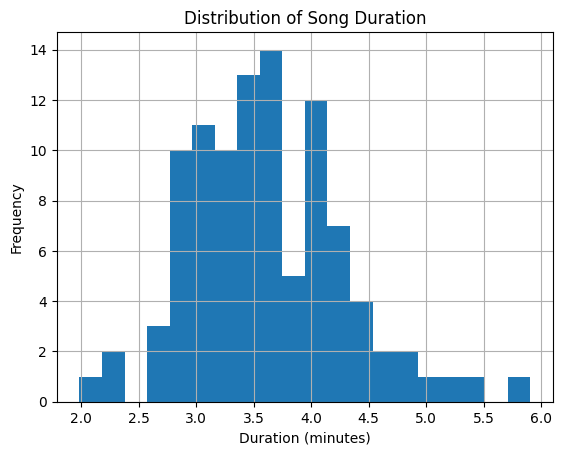

In [16]:
import matplotlib.pyplot as plt
merged_df['duration'].hist(bins=20)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Duration')
plt.show()

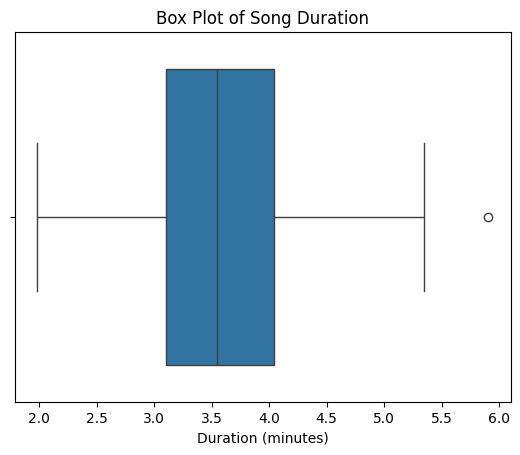

In [17]:
# Box plot
import seaborn as sns
sns.boxplot(x=merged_df['duration'])
plt.xlabel('Duration (minutes)')
plt.title('Box Plot of Song Duration')
plt.show()

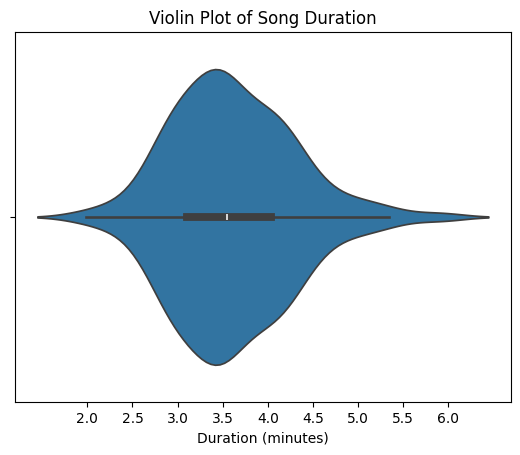

In [18]:
# Violin plot
sns.violinplot(x=merged_df['duration'])
plt.xlabel('Duration (minutes)')
plt.title('Violin Plot of Song Duration')
plt.xticks(ticks=[2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])     #, labels=['2 min', '3 min', '4 min', '5 min', '6 min'])
plt.show()

### Popularity distribution

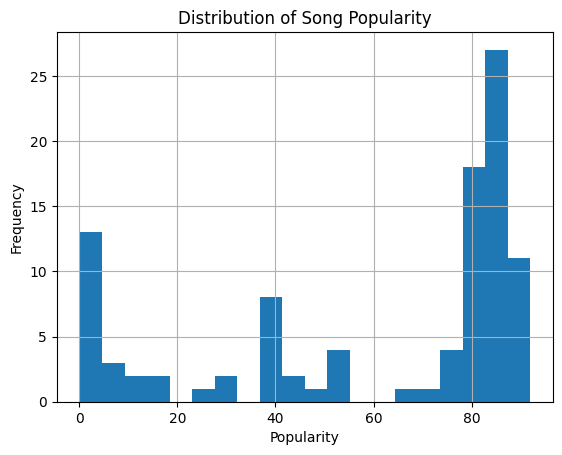

In [19]:
df['popularity'].hist(bins=20)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')
plt.show()

### Most popular songs

In [20]:
merged_df.sort_values(by='popularity', ascending=False).head(10)['name']

47        Cruel Summer
50    I Wanna Be Yours
8      Sweater Weather
56    The Night We Met
3            As It Was
45              Yellow
0      Blinding Lights
63        Viva La Vida
81             Flowers
27        Another Love
Name: name, dtype: object

### Songs with the Highest/lowest Scores for Each Audio Feature

In [21]:
# Find the song with the highest acousticness score
highest_acousticness = merged_df.loc[merged_df['acousticness'].idxmax()]

# Find the song with the highest danceability score
highest_danceability = merged_df.loc[merged_df['danceability'].idxmax()]

# Find the song with the highest energy score
highest_energy = merged_df.loc[merged_df['energy'].idxmax()]

# Find the song with the highest instrumentalness score
highest_instrumentalness = merged_df.loc[merged_df['instrumentalness'].idxmax()]

# Find the song with the highest liveness score
highest_liveness = merged_df.loc[merged_df['liveness'].idxmax()]

# Find the song with the highest-lowest loudness score
highest_loudness = merged_df.loc[merged_df['loudness'].idxmax()]
lowest_loudness = merged_df.loc[merged_df['loudness'].idxmin()]

# Find the song with the highest speechiness score
highest_speechiness = merged_df.loc[merged_df['speechiness'].idxmax()]

# Find the song with the highest-lowest tempo score
highest_tempo = merged_df.loc[merged_df['tempo'].idxmax()]
lowest_tempo = merged_df.loc[merged_df['tempo'].idxmin()]

# Find the song with the highest valence score
highest_valence = merged_df.loc[merged_df['valence'].idxmax()]

# Find the song with the longest-shortest duration
longest_duration = merged_df.loc[merged_df['duration'].idxmax()]
shortest_duration = merged_df.loc[merged_df['duration'].idxmin()]

# Print the results
print("Song with the highest acousticness score:")
print(highest_acousticness[['name', 'acousticness', 'artists', 'genres']])

print("\nSong with the highest danceability score:")
print(highest_danceability[['name', 'danceability', 'artists', 'genres']])

print("\nSong with the highest energy score:")
print(highest_energy[['name', 'energy', 'artists', 'genres']])

print("\nSong with the highest instrumentalness score:")
print(highest_instrumentalness[['name', 'instrumentalness', 'artists', 'genres']])

print("\nSong with the highest liveness score:")
print(highest_liveness[['name', 'liveness', 'artists', 'genres']])
print('High Liveness:0.8 (likely a live recording), Moderate Liveness:0.6-0.8 (some live elements) otherwise Low Liveness')
    
print("\nSong with the highest loudness score:")
print(highest_loudness[['name', 'loudness', 'artists', 'genres']])
print("\nSong with the lowest loudness score:")
print(lowest_loudness[['name', 'loudness', 'artists', 'genres']])
print('loudness value between -60 dB (very quiet) and 0 dB (very loud)')
      
print("\nSong with the highest speechiness score:")
print(highest_speechiness[['name', 'speechiness', 'artists', 'genres']])

print("\nSong with the highest tempo score:")
print(highest_tempo[['name', 'tempo', 'artists', 'genres']])
print("\nSong with the lowest tempo score:")
print(lowest_tempo[['name', 'tempo', 'artists', 'genres']])

print("\nSong with the highest valence score:")
print(highest_valence[['name', 'valence', 'artists', 'genres']])

print("\nSong with the longest duration:")
print(longest_duration[['name', 'duration', 'artists', 'genres']])
print("\nSong with the shortest duration:")
print(shortest_duration[['name', 'duration', 'artists', 'genres']])

Song with the highest acousticness score:
name            The Night We Met
acousticness               0.968
artists               Lord Huron
genres                Indie Folk
Name: 56, dtype: object

Song with the highest danceability score:
name              Without Me
danceability           0.908
artists               Eminem
genres          Pop, Hip Hop
Name: 66, dtype: object

Song with the highest energy score:
name                Dangerous
energy                  0.926
artists    The Ramona Flowers
genres               Pop, R&B
Name: 68, dtype: object

Song with the highest instrumentalness score:
name                Not Regular
instrumentalness          0.734
artists                Mj Grizz
genres                  Hip Hop
Name: 88, dtype: object

Song with the highest liveness score:
name        The Night We Met
liveness               0.638
artists           Lord Huron
genres            Indie Folk
Name: 56, dtype: object
High Liveness:0.8 (likely a live recording), Moderate Livene

### Most popular genres on Spotify

In [22]:
genres_split = merged_df['genres'].str.split(', ')

# Explode the 'genres' column to have one genre per row
genres_exploded = merged_df.assign(genres=genres_split).explode('genres')

# Group by genre and calculate average popularity
genre_popularity = genres_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Print the result
print(genre_popularity)

genres
Folk Pop               88.000000
Baroque Pop            88.000000
Nu Metal               87.000000
New Wave               87.000000
Psychedelic Rock       86.000000
Funk                   86.000000
Indie Folk             85.500000
Alternative Hip Hop    85.000000
Rock                   83.500000
Pop Punk               83.000000
Future Bass            83.000000
Bedroom Pop            83.000000
Grunge                 82.000000
House                  82.000000
Dance-pop              81.500000
Emo Rap                81.000000
Progressive Rock       80.000000
Reggaeton              80.000000
Latin Pop              76.000000
Disco                  75.000000
Indie Rock             71.800000
Synth-pop              70.000000
Rap                    70.000000
Hip Hop                64.888889
R&B                    64.272727
Pop Rap                62.666667
Electropop             61.285714
Pop                    61.175000
Indie Pop              59.875000
Alternative Rock       59.111111
Sou

### How do audio features vary across different genres?

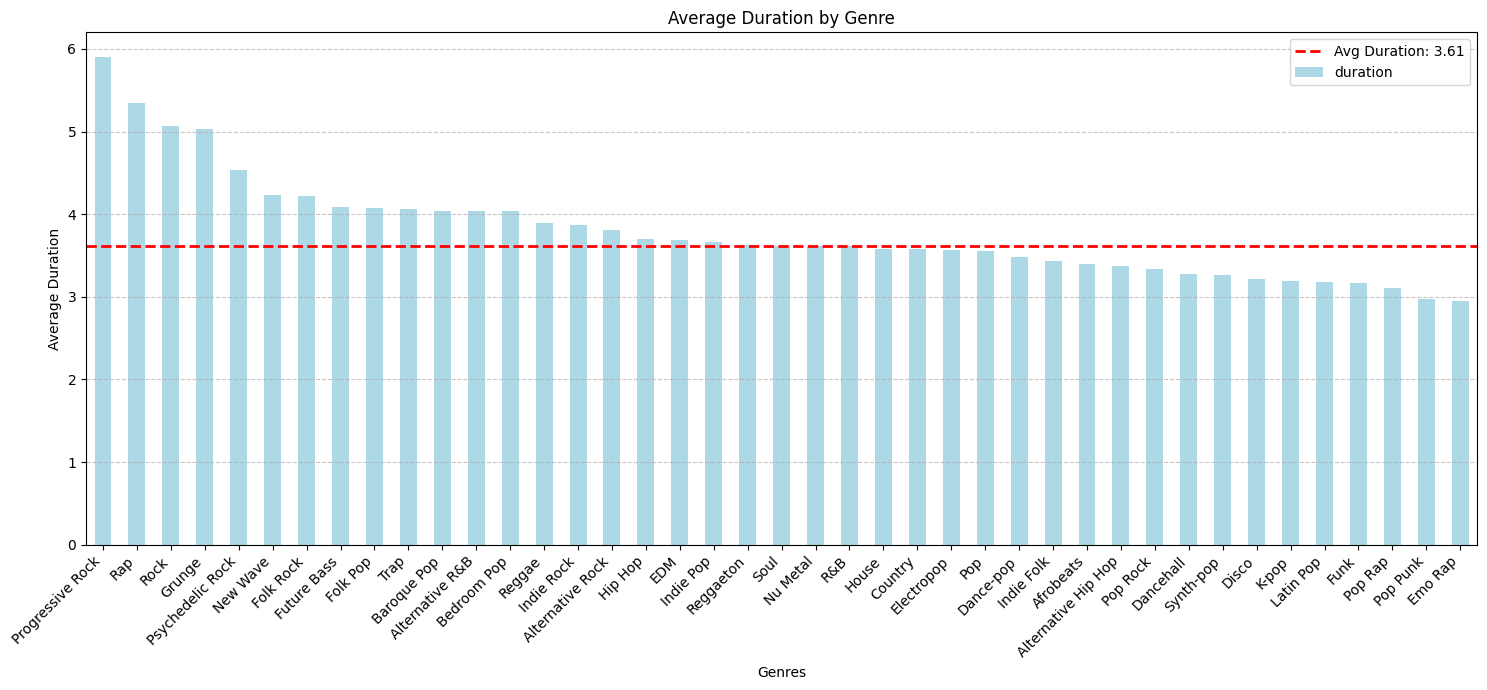

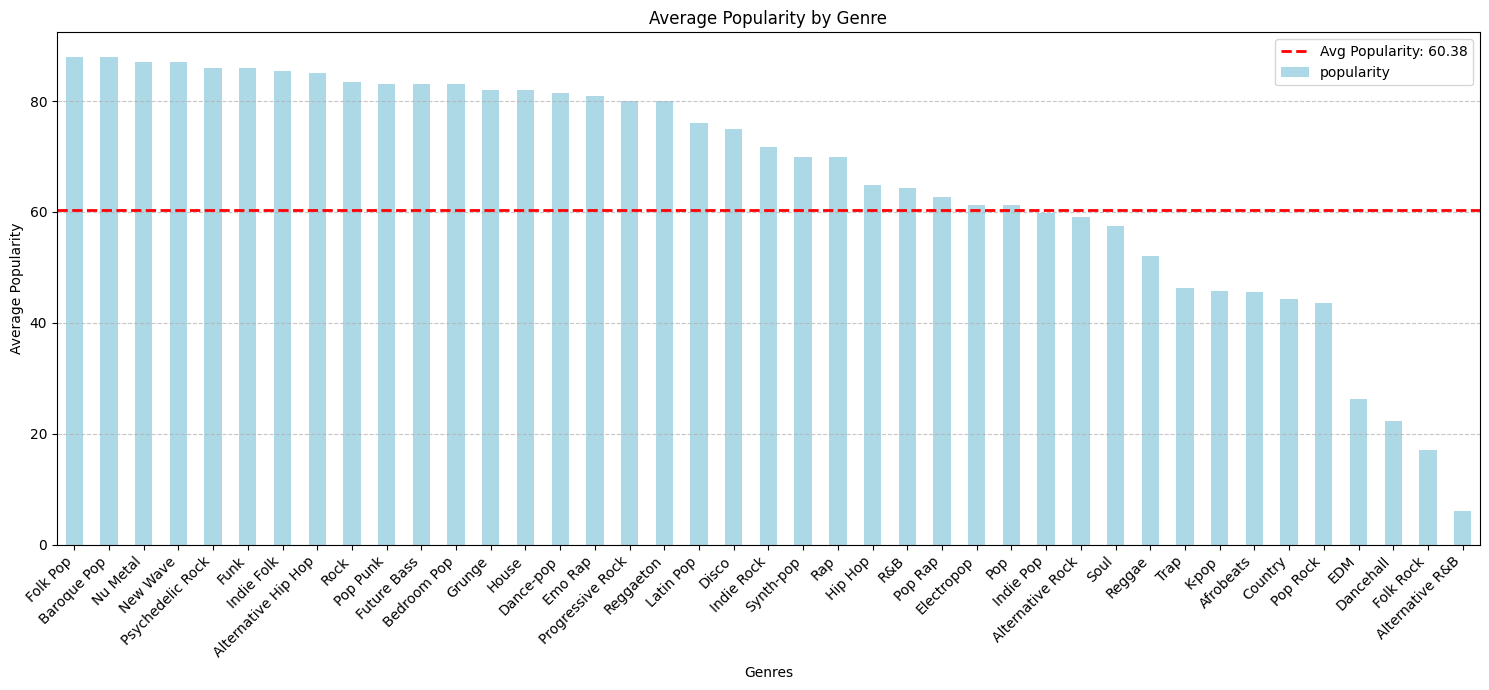

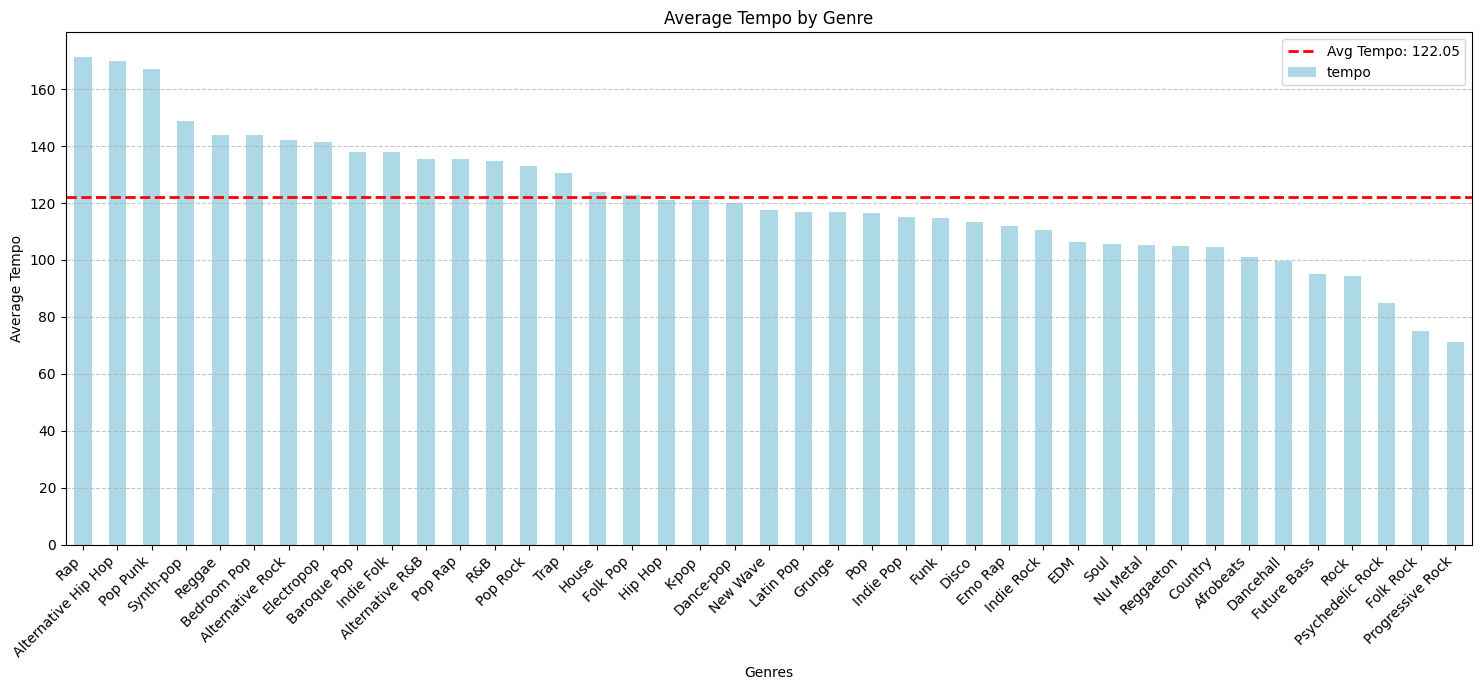

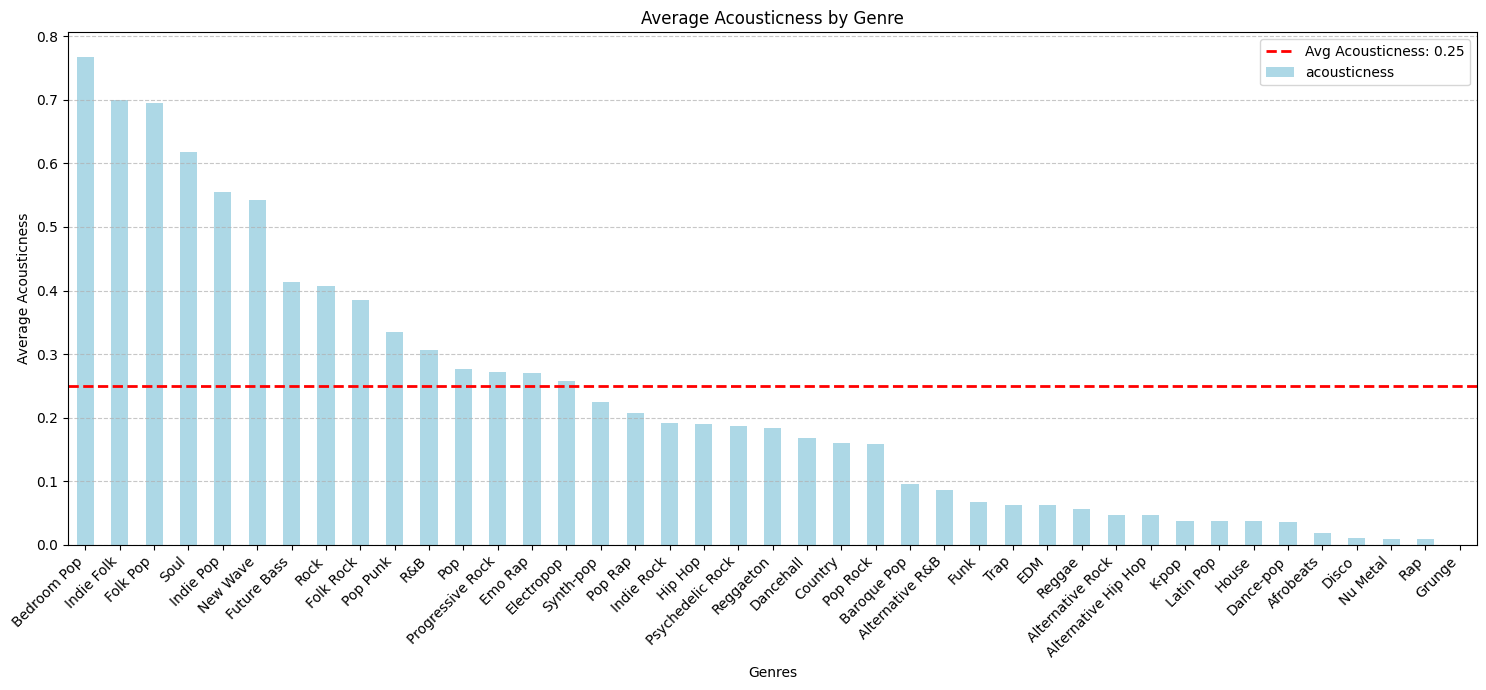

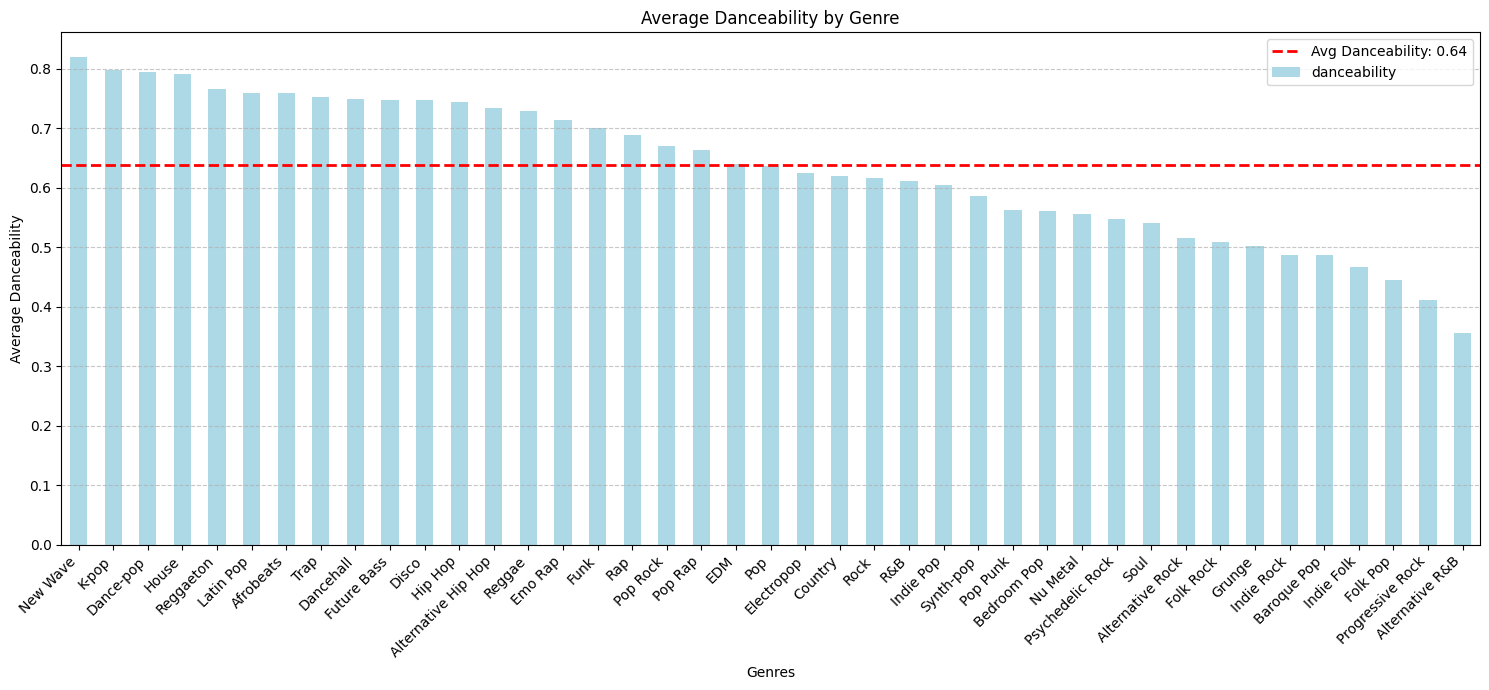

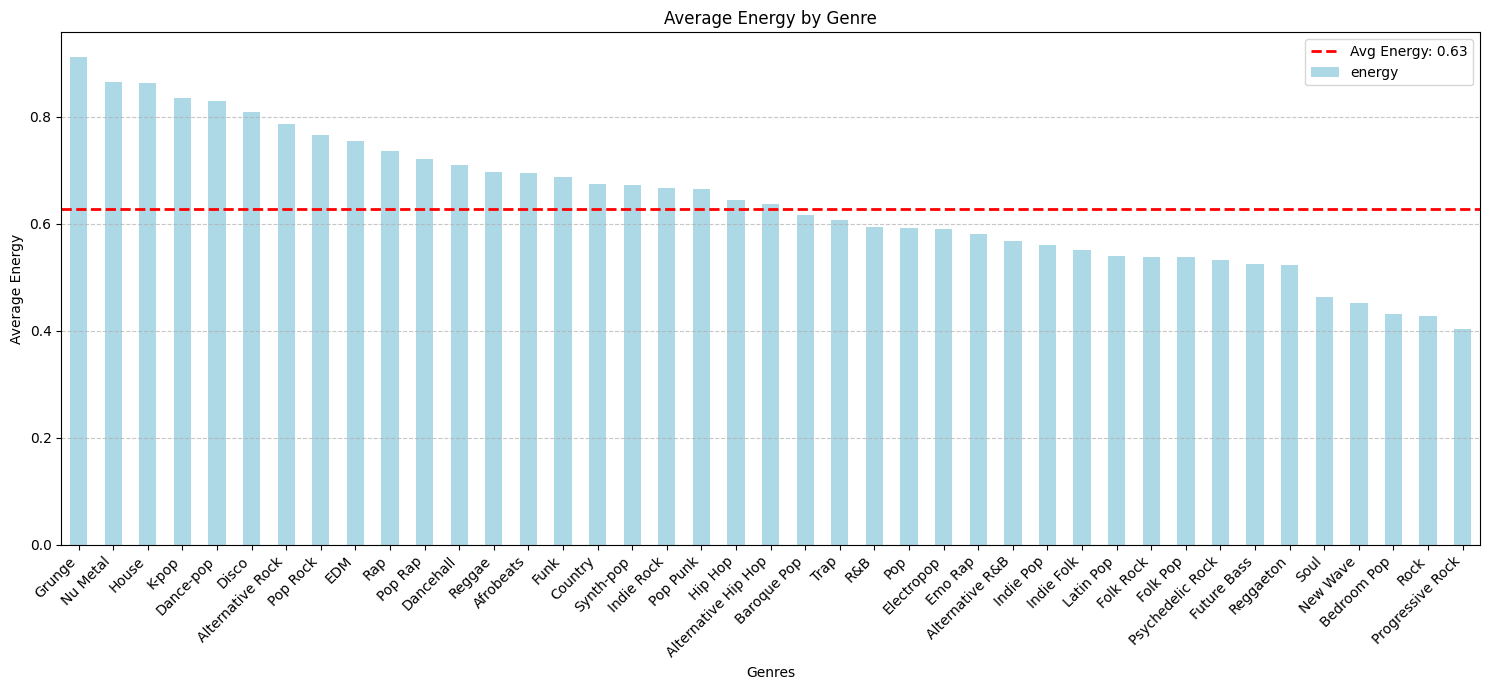

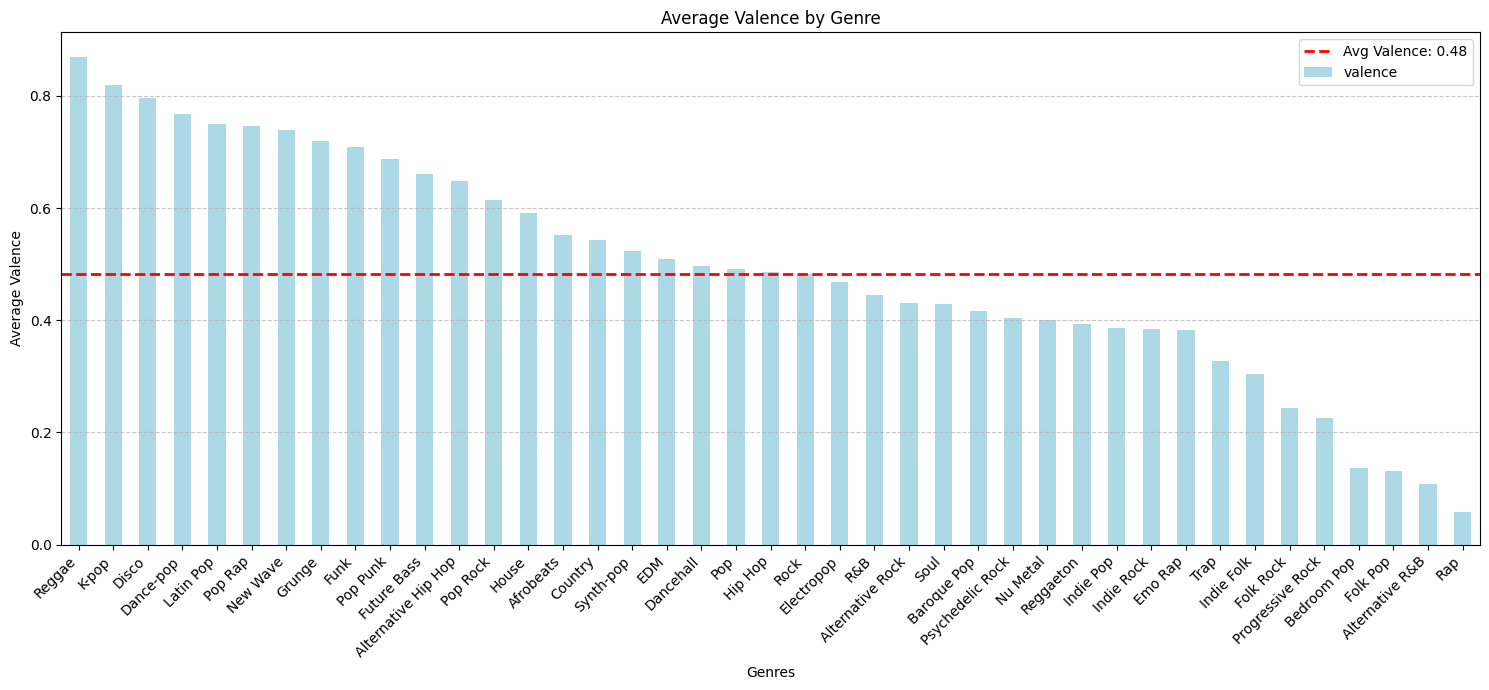

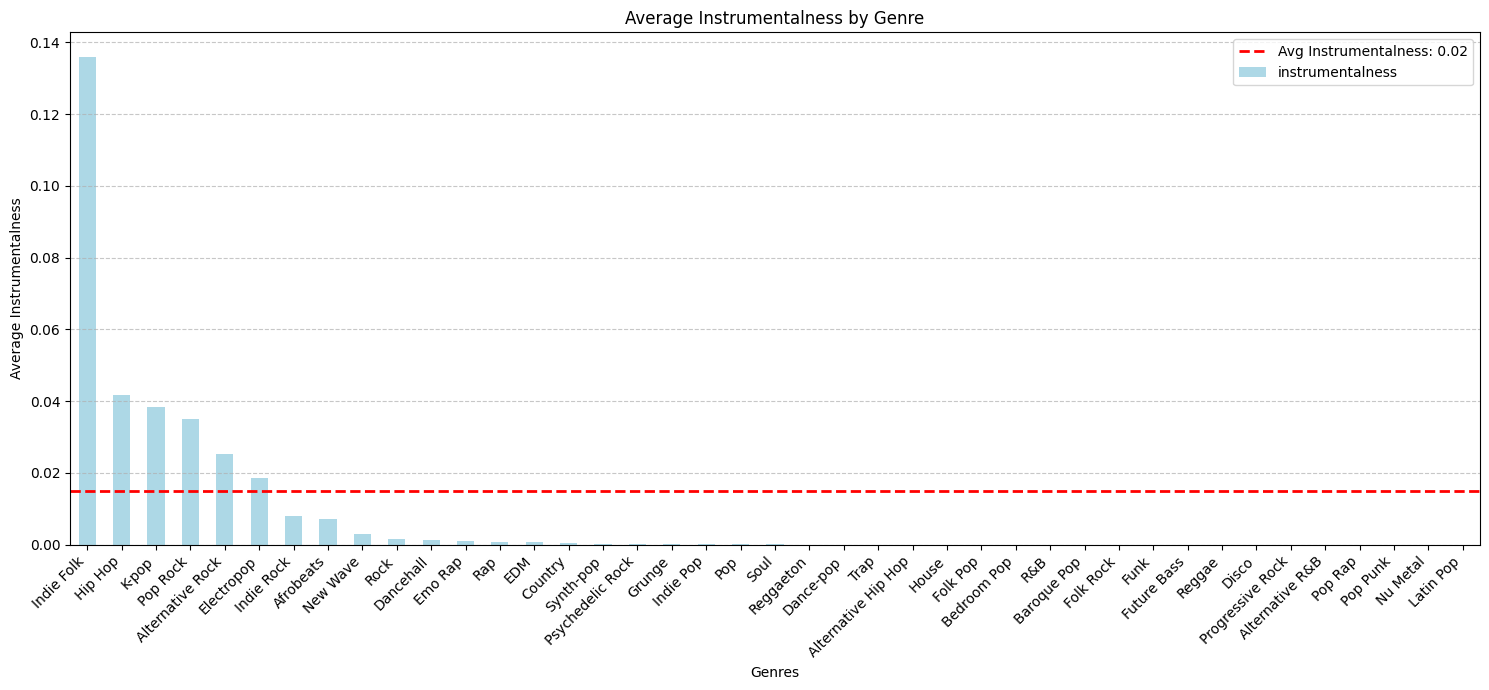

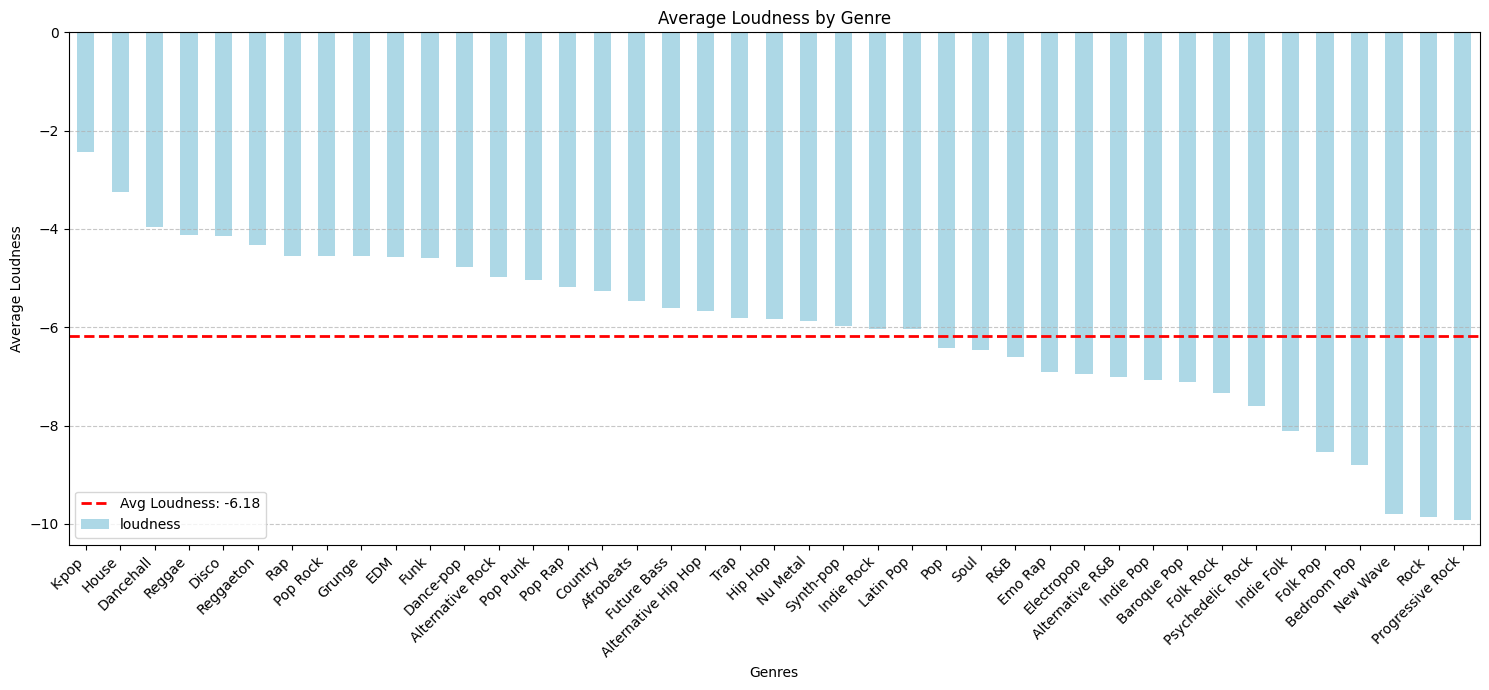

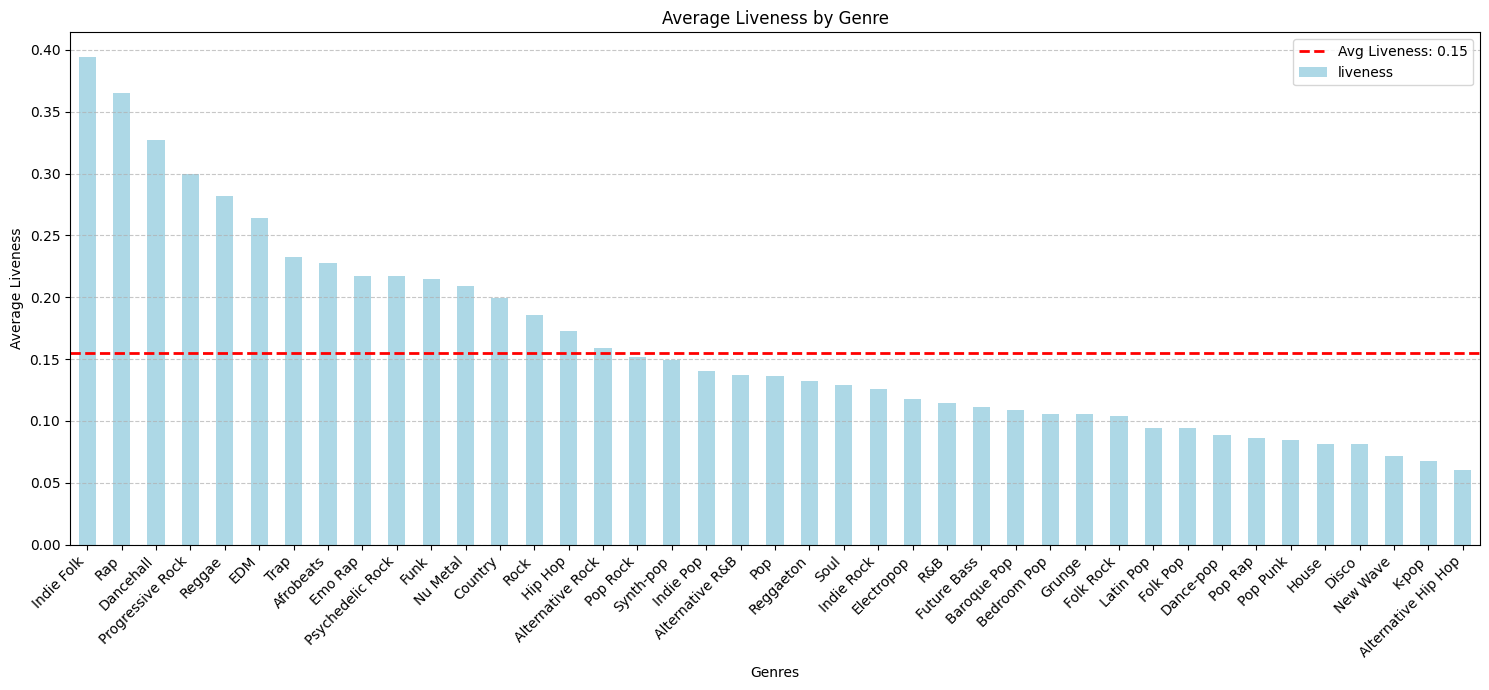

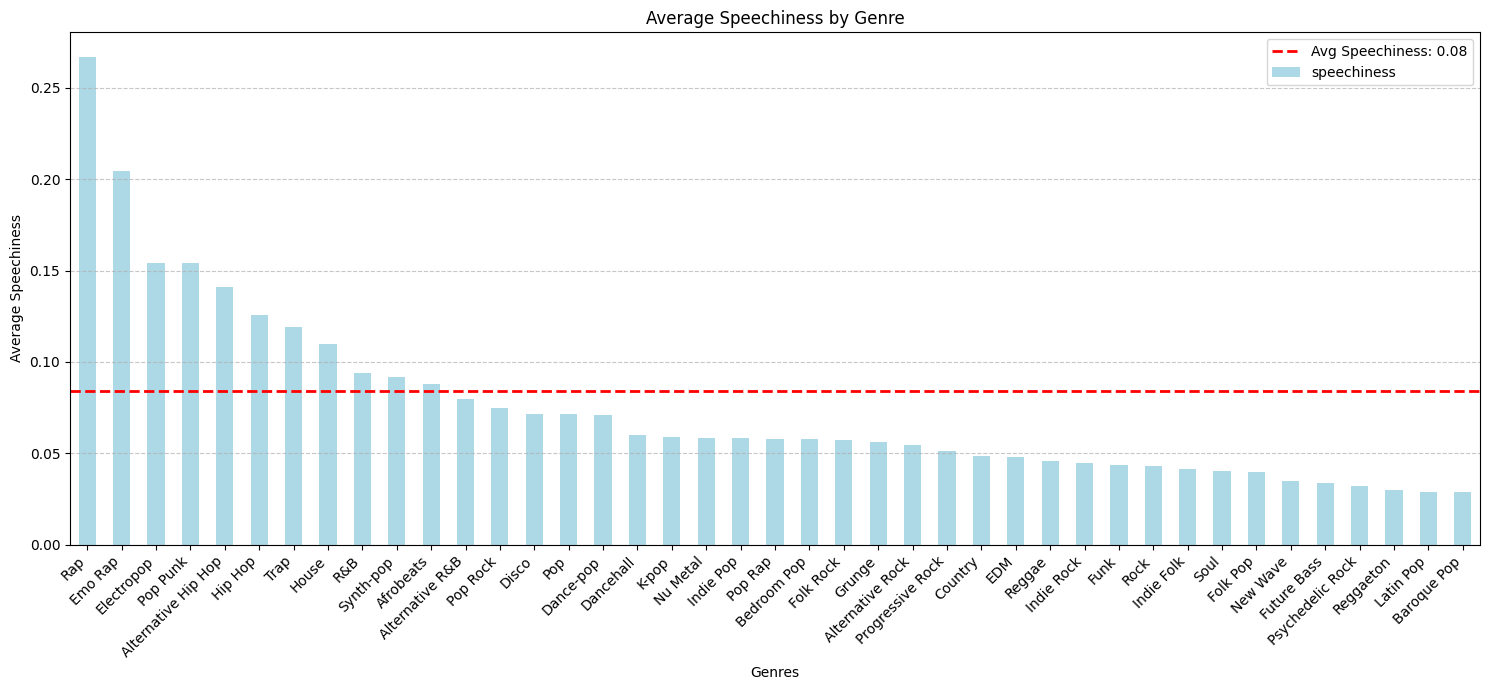

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of audio features to analyze
audio_features = ['duration','popularity','tempo','acousticness','danceability','energy','valence','instrumentalness', 'loudness','liveness','speechiness']

for feature in audio_features:
    
    # Drop rows where the feature is NaN
    filtered_df = genres_exploded.dropna(subset=[feature])
    
    # Calculate the average value of the feature for each genre
    genre_features = filtered_df.groupby('genres')[feature].mean().sort_values(ascending=False)
    
    # Plot the results
    plt.figure(figsize=(15, 7))
    genre_features.plot(kind='bar', color='lightblue')
    plt.title(f'Average {feature.capitalize()} by Genre')
    plt.xlabel('Genres')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Draw the average line for the feature
    avg_feature = merged_df[feature].mean()
    plt.axhline(y=avg_feature, color='red', linestyle='--', linewidth=2, label=f'Avg {feature.capitalize()}: {avg_feature:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

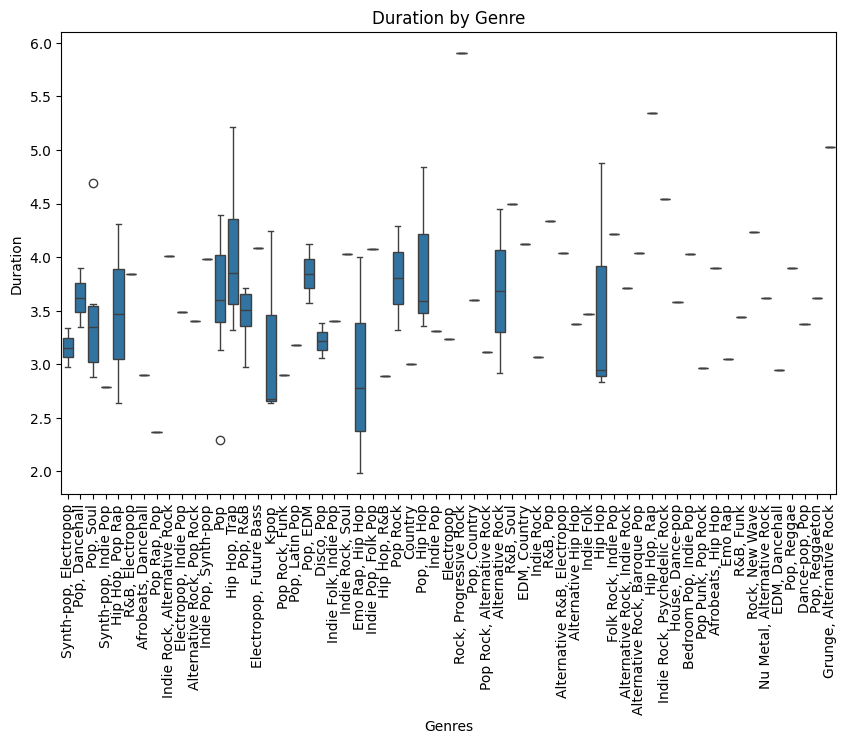

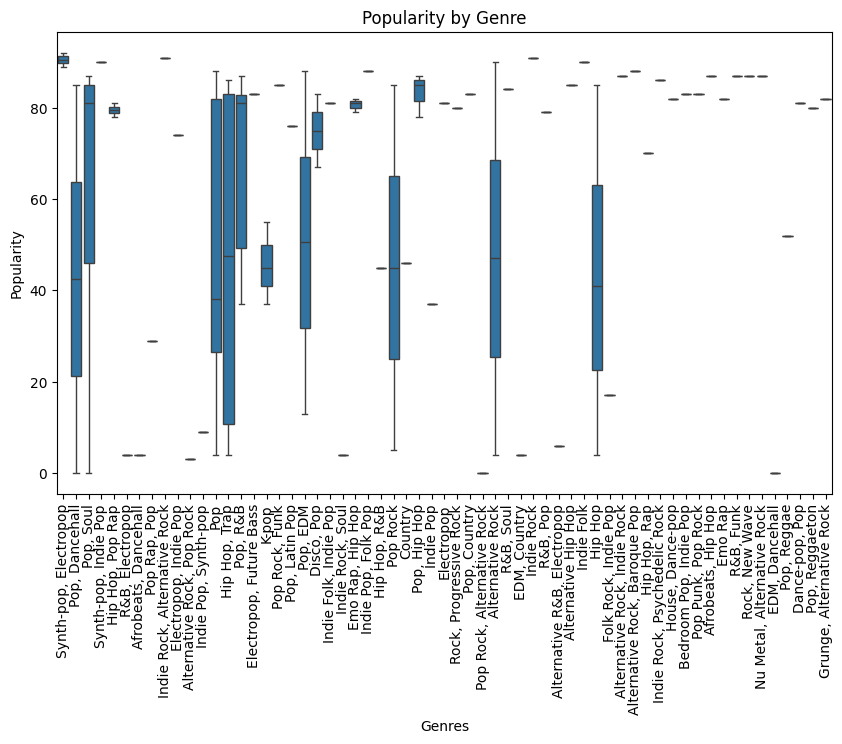

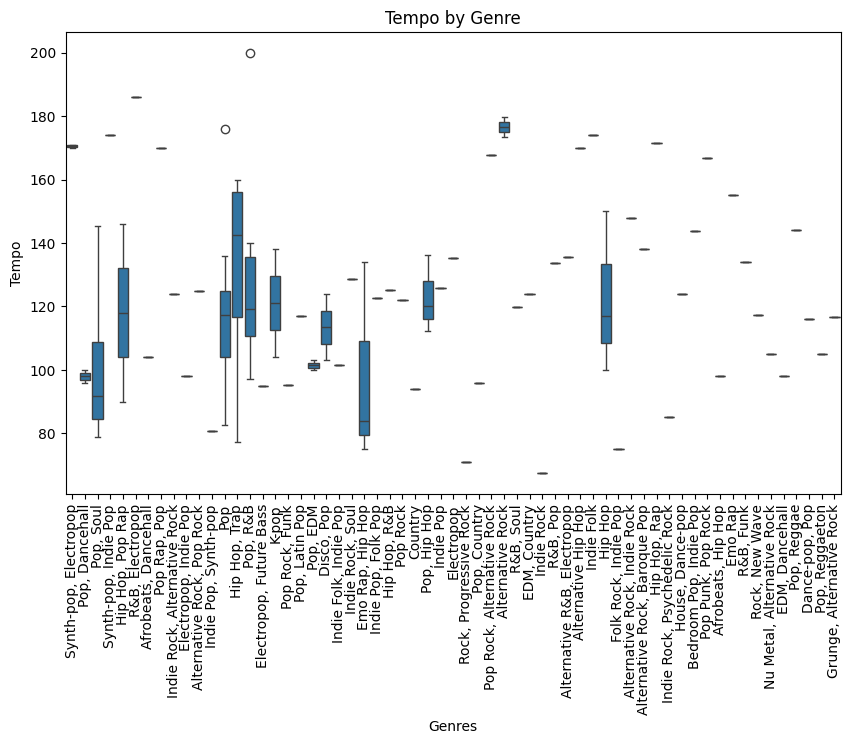

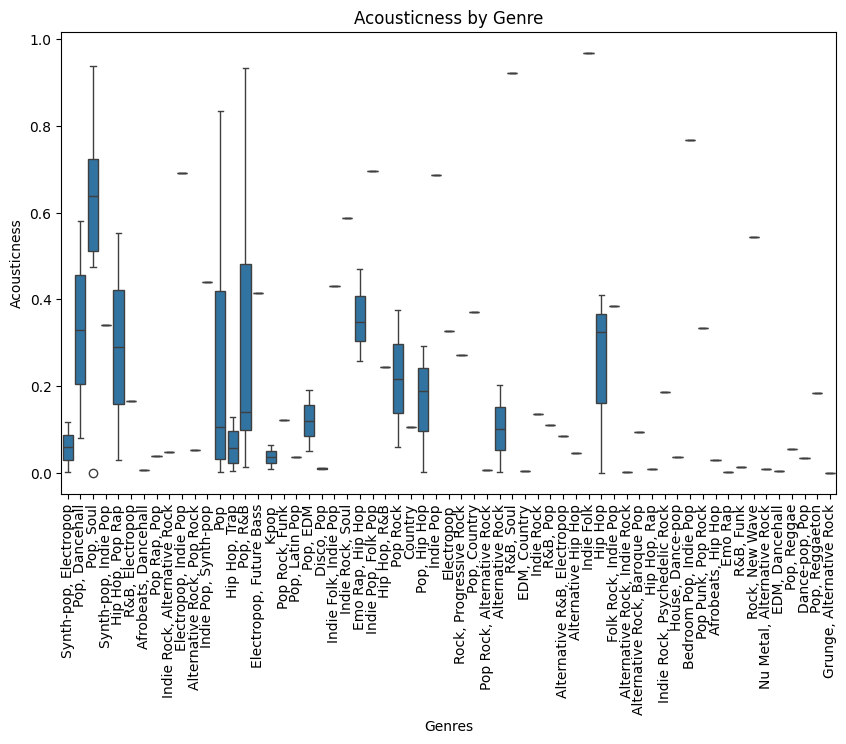

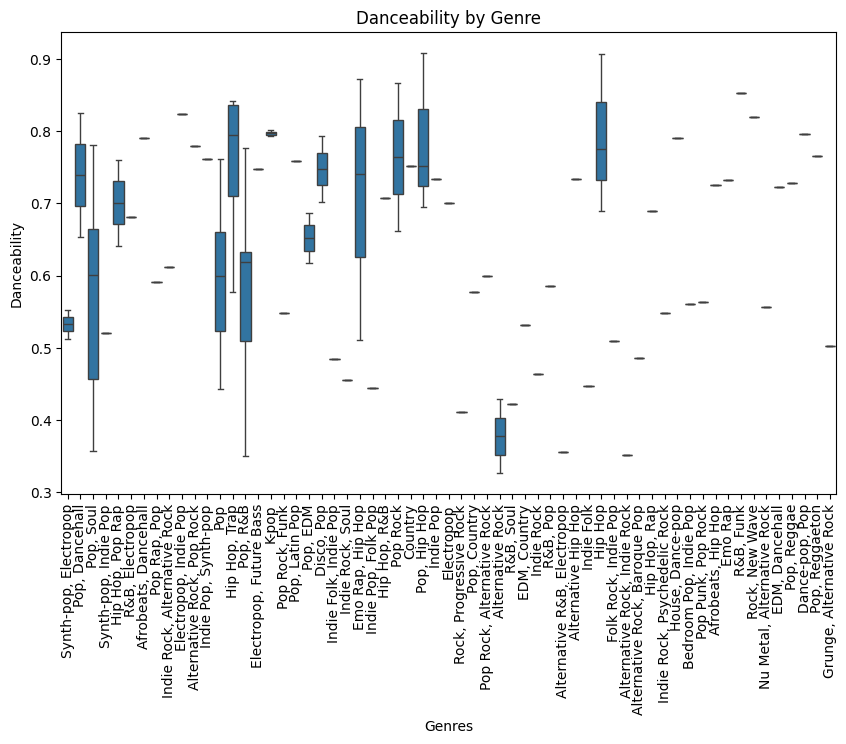

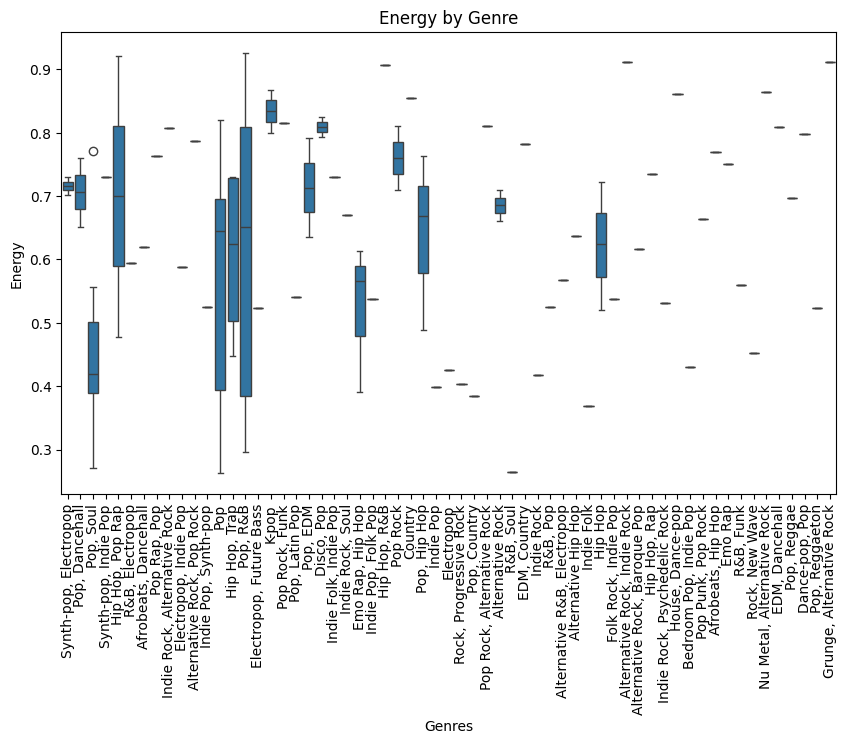

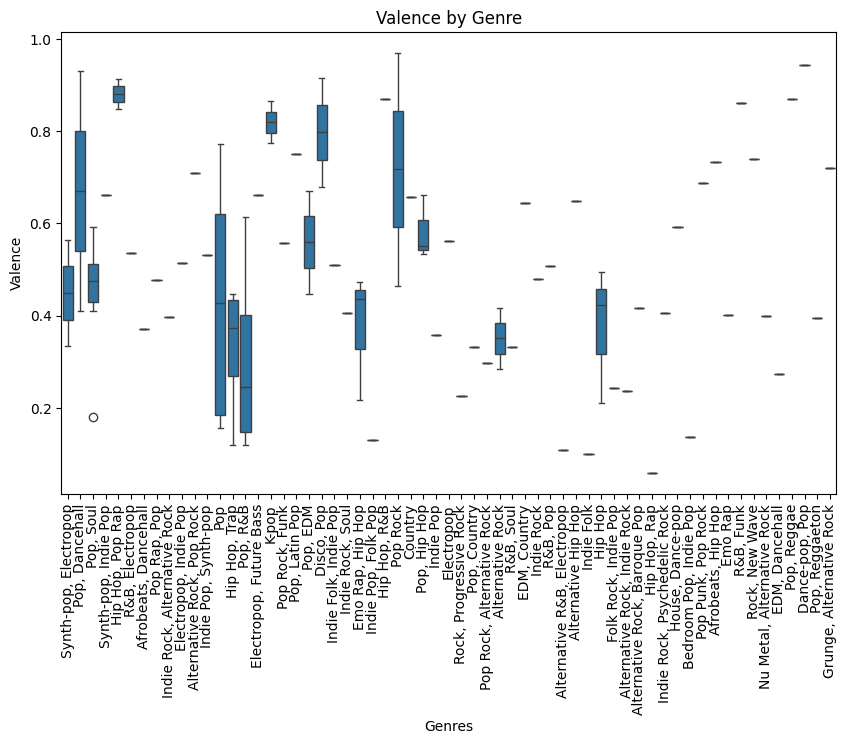

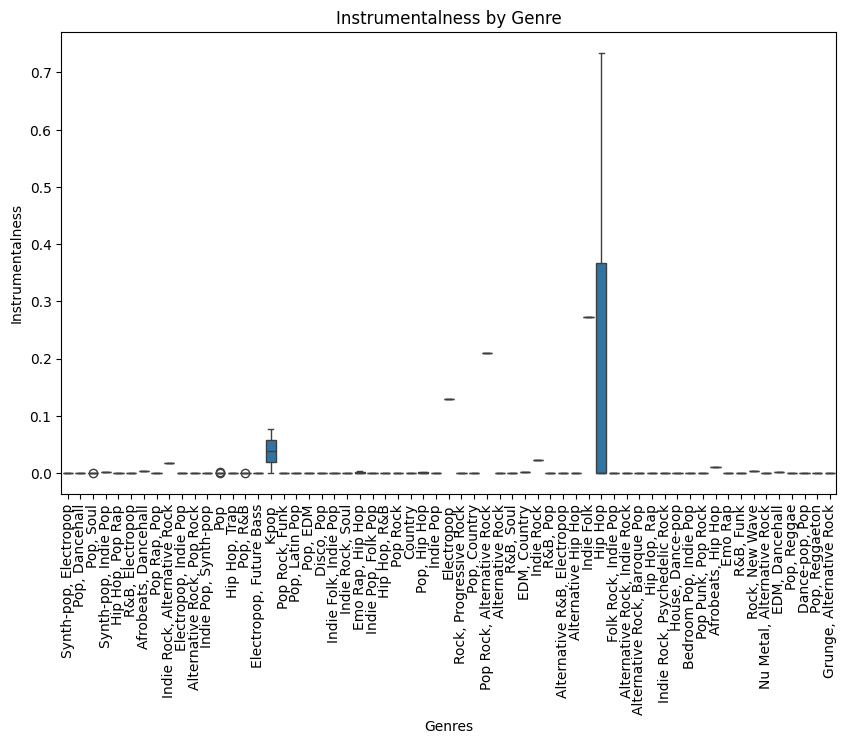

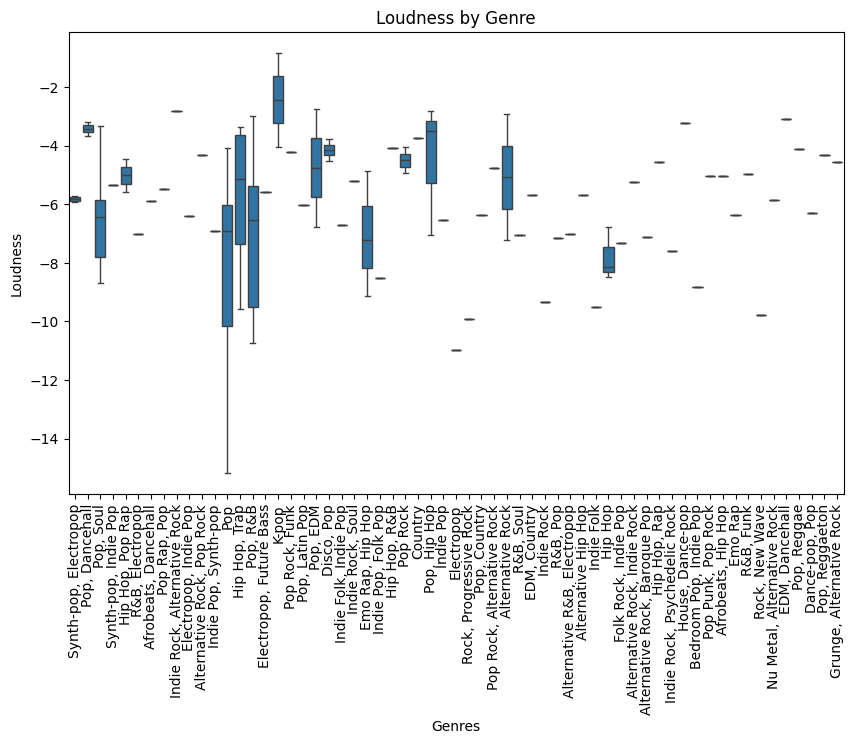

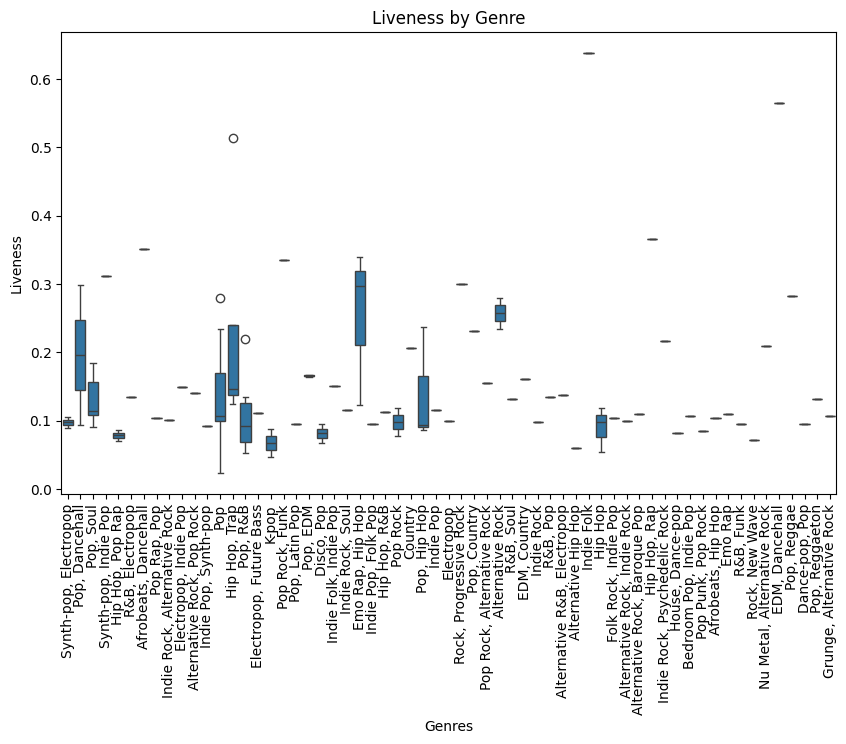

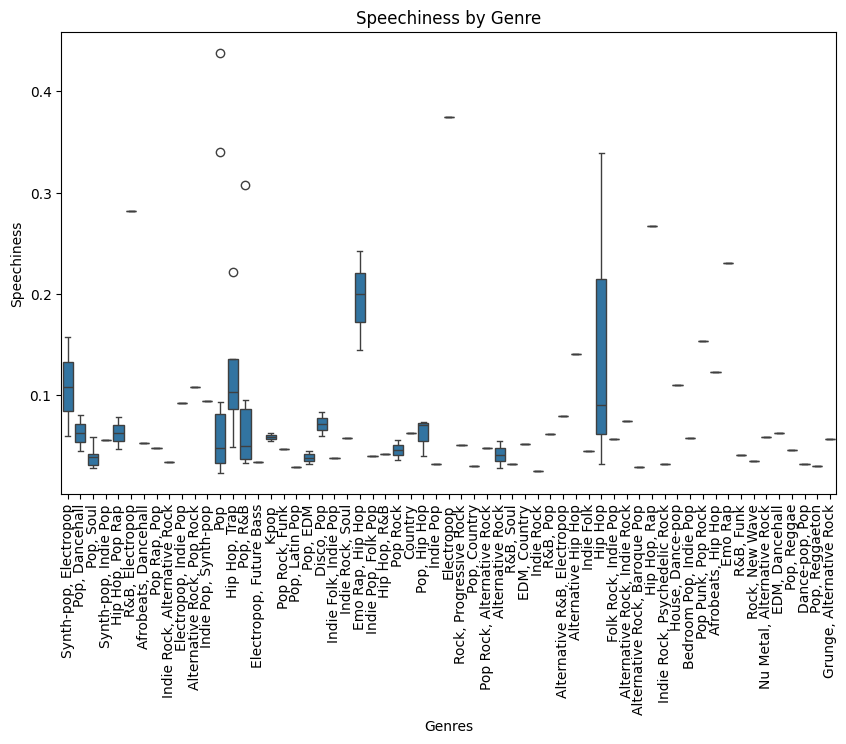

In [24]:
# Box Plot for more Details.
import matplotlib.pyplot as plt
import seaborn as sns
# List of audio features to analyze
audio_features = ['duration','popularity','tempo','acousticness','danceability','energy','valence','instrumentalness', 'loudness','liveness','speechiness']

# Loop through each audio feature and create a boxplot
for feature in audio_features:
    # Drop rows where the feature is NaN
    filtered_df = merged_df.dropna(subset=[feature])
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
    sns.boxplot(x='genres', y=feature, data=filtered_df)
    plt.title(f'{feature.capitalize()} by Genre')
    plt.xticks(rotation=90)
    plt.xlabel('Genres')
    plt.ylabel(feature.capitalize())
    plt.show()

### Trends in song characteristics (e.g., duration, tempo) over the years

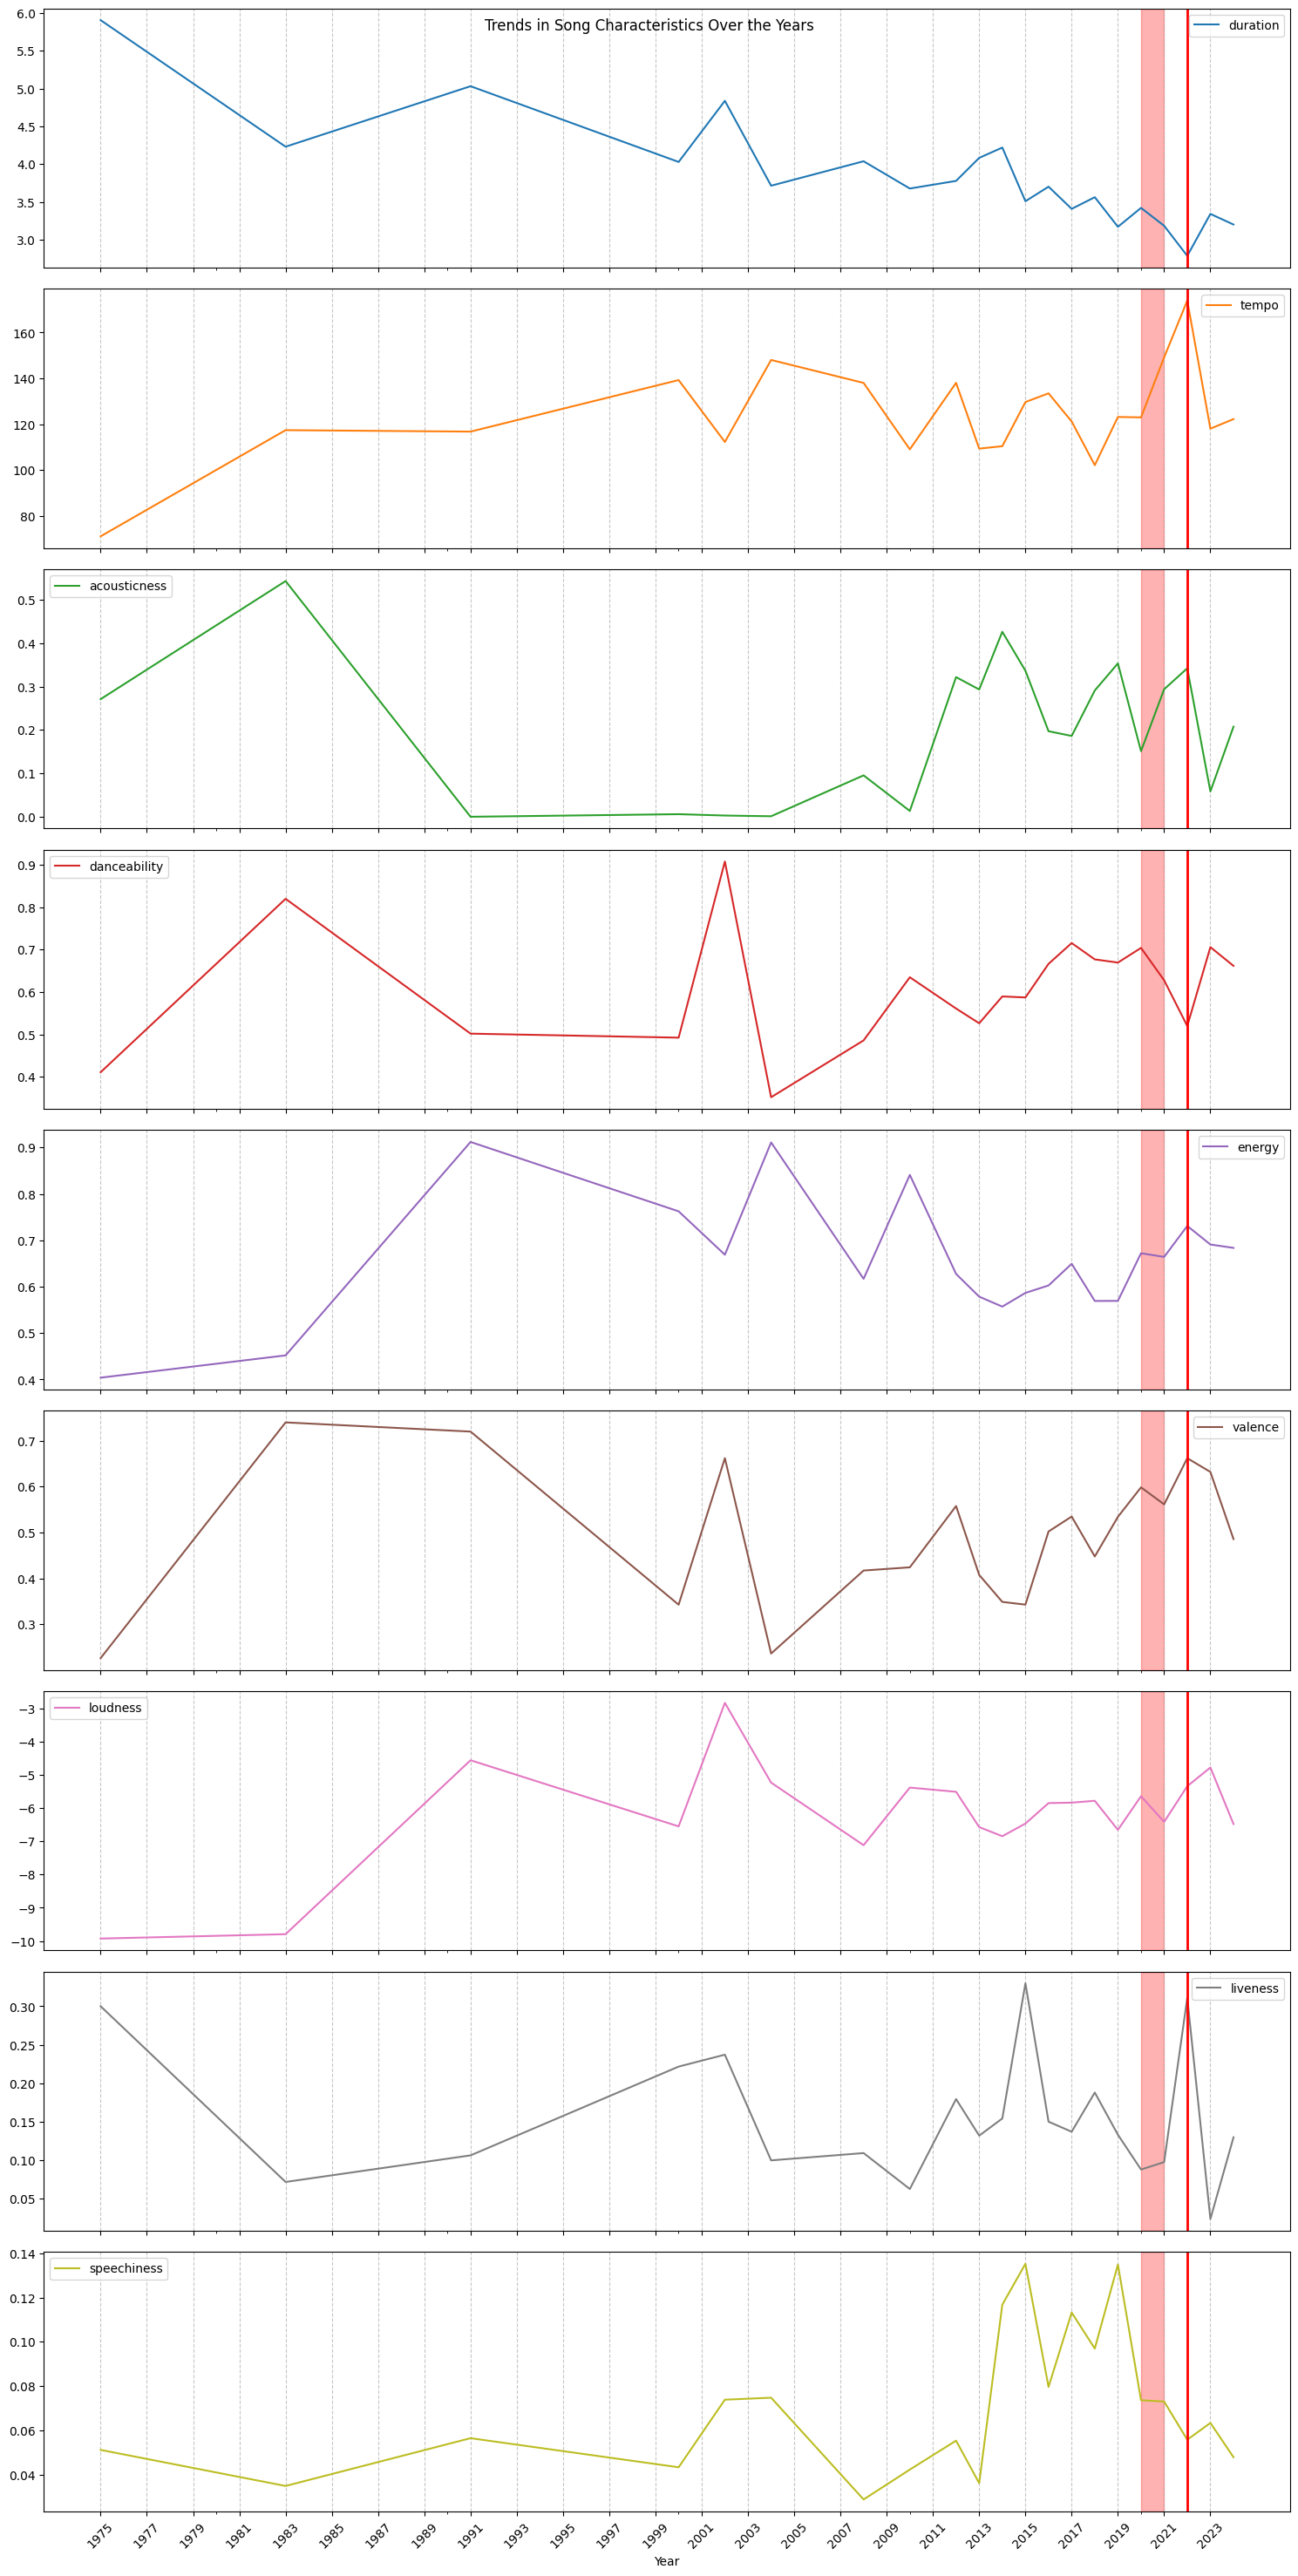

In [25]:
import matplotlib.pyplot as plt

# Extract the year from the release date
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year

# filter out the Nan values
filtered_df = merged_df.dropna(subset=['duration', 'tempo','acousticness','danceability','energy','valence','loudness','liveness','speechiness'])

# Group by release year and calculate the mean of each characteristic
yearly_trends = filtered_df.groupby('release_year')[['duration', 'tempo','acousticness','danceability','energy','valence','loudness','liveness','speechiness']].mean()

# Plot the trends
axes = yearly_trends.plot(subplots=True, figsize=(15, 30), title='Trends in Song Characteristics Over the Years')

# Draw a vertical line at x=2022 and set x-ticks - LOOP IS NECESSARY TO SHOW IN BOTH SUBPLOTS - otherwise simple plt.___
for ax in axes:
    ax.axvline(x=2022, color='red', linestyle='-', linewidth=2)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_xticks(range(yearly_trends.index.min(), yearly_trends.index.max() + 1, 2))
    ax.tick_params(axis='x', rotation=45)
    ax.axvspan(2020, 2021, color='red', alpha=0.3)  # Highlight COVID years
    ax.set_xlabel('Year')

plt.tight_layout()
plt.show()

In [26]:
# # Extract the year from the release date
# merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year
# yearly_trends = merged_df.groupby('release_year')[['duration', 'tempo']].mean()
# yearly_trends.plot(subplots=True, figsize=(15, 10), title='Trends in Song Characteristics Over the Years')
# plt.axvline(x=2022, color='red', linestyle='-', linewidth=2)
# plt.xlabel('Year')
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.axvspan(2020, 2021, color='red', alpha=0.3) #highlight covid years
# plt.xticks(range(yearly_trends.index.min(), yearly_trends.index.max() + 1, 2),rotation=45,ha='right')
# plt.show()

### Correlation heatmap between audio features

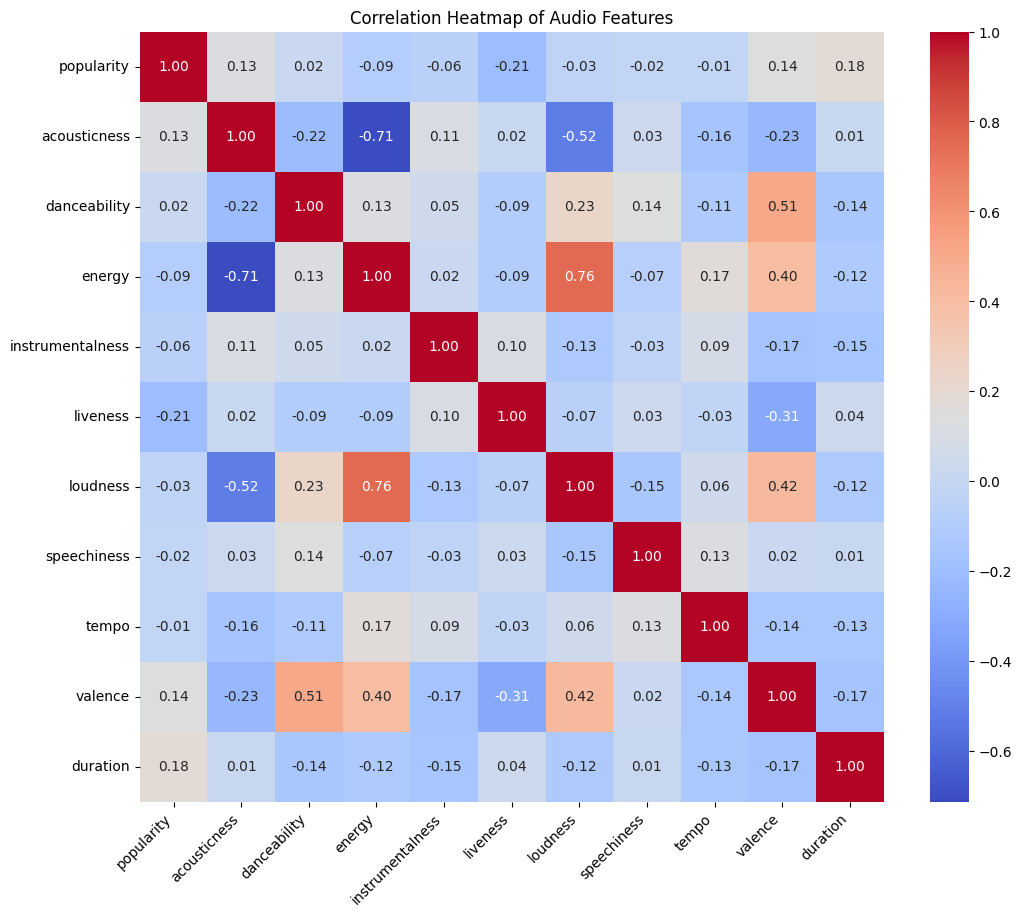

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

audio_features = ['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                  'speechiness','tempo', 'valence', 'duration']
audio_df = filtered_df[audio_features]

corr = audio_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}) 
# annot=True:adds annotations,
#fmt='.2f':format of the annotations. '.2f' means that the correlation values will be formatted to two decimal places
#annot_kws={"size": 10}: customize the appearance of the annotations. In this case, {"size": 10} sets the font size of the annotations to 10
plt.title('Correlation Heatmap of Audio Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Comprehensive analysis of the Artists having the most popular tracks, and their common characteristics

### Top 10 artists based on popularity

In [28]:
top_artists_by_popularity = merged_df.sort_values(by='popularity', ascending=False).head(10)['artists']
top_artists_by_popularity.reset_index(drop=True, inplace=True)
top_artists_by_popularity

0         Taylor Swift
1       Arctic Monkeys
2    The Neighbourhood
3           Lord Huron
4         Harry Styles
5             Coldplay
6           The Weeknd
7             Coldplay
8          Miley Cyrus
9            Tom Odell
Name: artists, dtype: object

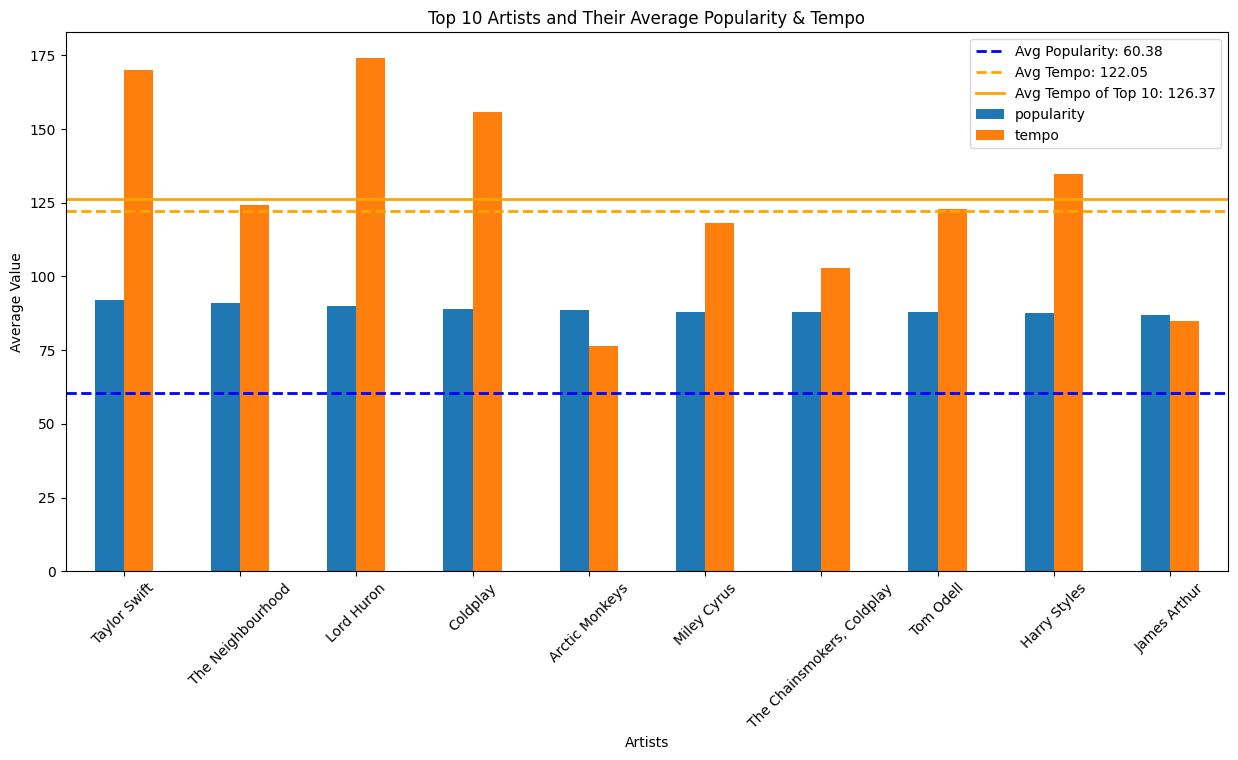

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Group by artists and calculate the mean popularity and other features
artist_popularity = filtered_df.groupby('artists')[['popularity', 'tempo']].mean()

# Sort by popularity
top_artists = artist_popularity.sort_values(by='popularity', ascending=False).head(10)

# Plot the results
top_artists.plot(kind='bar', figsize=(15, 7))
plt.title('Top 10 Artists and Their Average Popularity & Tempo')
plt.xlabel('Artists')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# Calculate the average popularity and tempo
avg_popularity = merged_df['popularity'].mean()
avg_tempo = merged_df['tempo'].mean()
avg_tempo_top = top_artists['tempo'].mean()

# Draw the average lines
plt.axhline(y=avg_popularity, color='blue', linestyle='--', linewidth=2, label=f'Avg Popularity: {avg_popularity:.2f}')
plt.axhline(y=avg_tempo, color='orange', linestyle='--', linewidth=2, label=f'Avg Tempo: {avg_tempo:.2f}')
plt.axhline(y=avg_tempo_top, color='orange', linestyle='-', linewidth=2, label=f'Avg Tempo of Top 10: {avg_tempo_top:.2f}')

# Add legend
plt.legend()

plt.show()

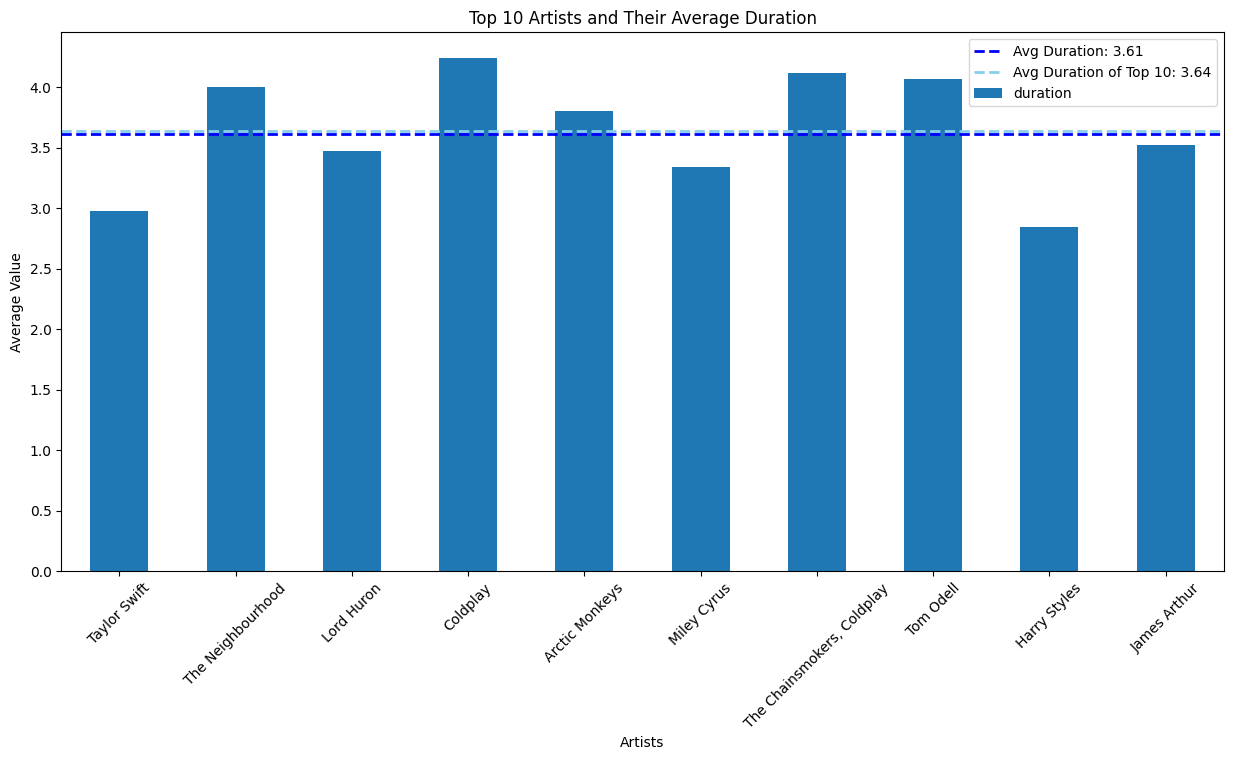

In [30]:
import matplotlib.pyplot as plt
# Group by artists and calculate the mean duration
artist_features = filtered_df.groupby('artists')[['duration']].mean()

# We already have top 10 artists based on popularity as top_artists
# Filter the features DataFrame to include only the top 10 artists
top_artist_features = artist_features.loc[top_artists.index]

# Plot the results
ax = top_artist_features.plot(kind='bar', figsize=(15, 7))
plt.title('Top 10 Artists and Their Average Duration')
plt.xlabel('Artists')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# Calculate the average values for each feature
avg_duration = merged_df['duration'].mean()
avg_duration_top = top_artist_features['duration'].mean()

# Draw the average lines
plt.axhline(y=avg_duration, color='blue', linestyle='--', linewidth=2, label=f'Avg Duration: {avg_duration:.2f}')
plt.axhline(y=avg_duration_top, color='skyblue', linestyle='--', linewidth=2, label=f'Avg Duration of Top 10: {avg_duration_top:.2f}')

# Add legend
plt.legend()

plt.show()

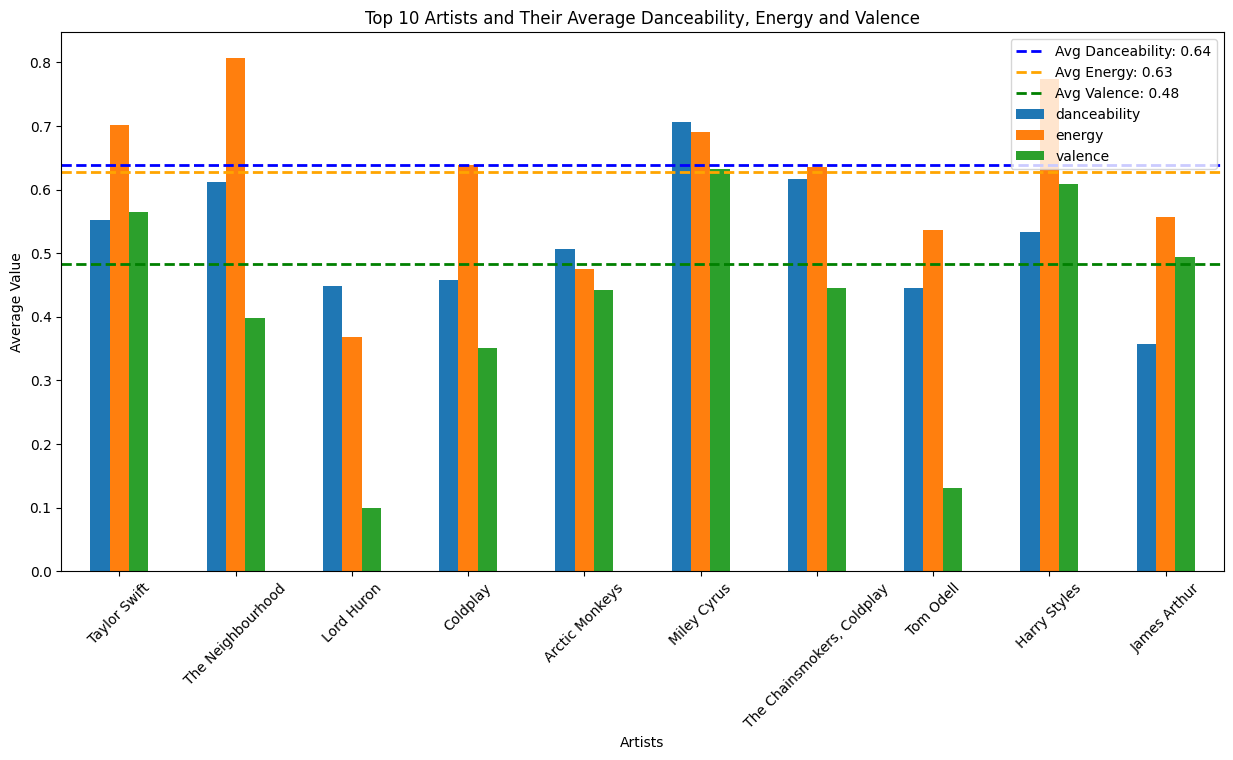

In [31]:
import matplotlib.pyplot as plt
# Group by artists and calculate the mean danceability and energy
artist_features = filtered_df.groupby('artists')[['danceability', 'energy','valence']].mean()

# We already have top 10 artists based on popularity as top_artists
# Filter the features DataFrame to include only the top 10 artists
top_artist_features = artist_features.loc[top_artists.index]

# Plot the results
ax = top_artist_features.plot(kind='bar', figsize=(15, 7))
plt.title('Top 10 Artists and Their Average Danceability, Energy and Valence')
plt.xlabel('Artists')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# Calculate the average values for each feature
avg_danceability = merged_df['danceability'].mean()
avg_energy = merged_df['energy'].mean()
avg_valence = merged_df['valence'].mean()

# Draw the average lines
plt.axhline(y=avg_danceability, color='blue', linestyle='--', linewidth=2, label=f'Avg Danceability: {avg_danceability:.2f}')
plt.axhline(y=avg_energy, color='orange', linestyle='--', linewidth=2, label=f'Avg Energy: {avg_energy:.2f}')
plt.axhline(y=avg_valence, color='green', linestyle='--', linewidth=2, label=f'Avg Valence: {avg_valence:.2f}')

# Add legend
plt.legend()

plt.show()

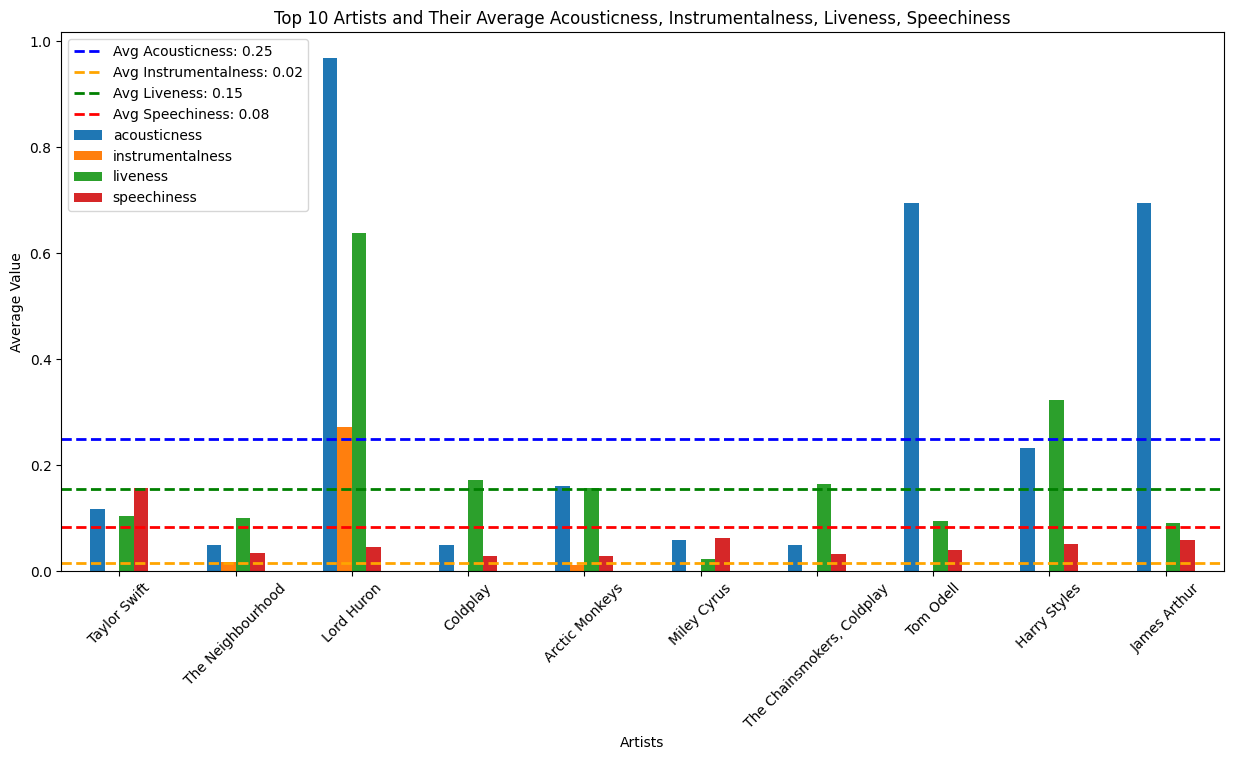

In [32]:
import matplotlib.pyplot as plt

# Group by artists and calculate the mean danceability and energy
artist_features = merged_df.groupby('artists')[['acousticness','instrumentalness', 'liveness', 'speechiness']].mean()

# We already have top 10 artists based on popularity as top_artists
# Filter the features DataFrame to include only the top 10 artists
top_artist_features = artist_features.loc[top_artists.index]

# Plot the results
ax = top_artist_features.plot(kind='bar', figsize=(15, 7))
plt.title('Top 10 Artists and Their Average Acousticness, Instrumentalness, Liveness, Speechiness')
plt.xlabel('Artists')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# Calculate the average values for each feature
avg_acousticness = merged_df['acousticness'].mean()
avg_instrumentalness = merged_df['instrumentalness'].mean()
avg_liveness = merged_df['liveness'].mean()
avg_speechiness = merged_df['speechiness'].mean()

# Draw the average lines
plt.axhline(y=avg_acousticness, color='blue', linestyle='--', linewidth=2, label=f'Avg Acousticness: {avg_acousticness:.2f}')
plt.axhline(y=avg_instrumentalness, color='orange', linestyle='--', linewidth=2, label=f'Avg Instrumentalness: {avg_instrumentalness:.2f}')
plt.axhline(y=avg_liveness, color='green', linestyle='--', linewidth=2, label=f'Avg Liveness: {avg_liveness:.2f}')
plt.axhline(y=avg_speechiness, color='red', linestyle='--', linewidth=2, label=f'Avg Speechiness: {avg_speechiness:.2f}')

# Add legend
plt.legend()

plt.show()


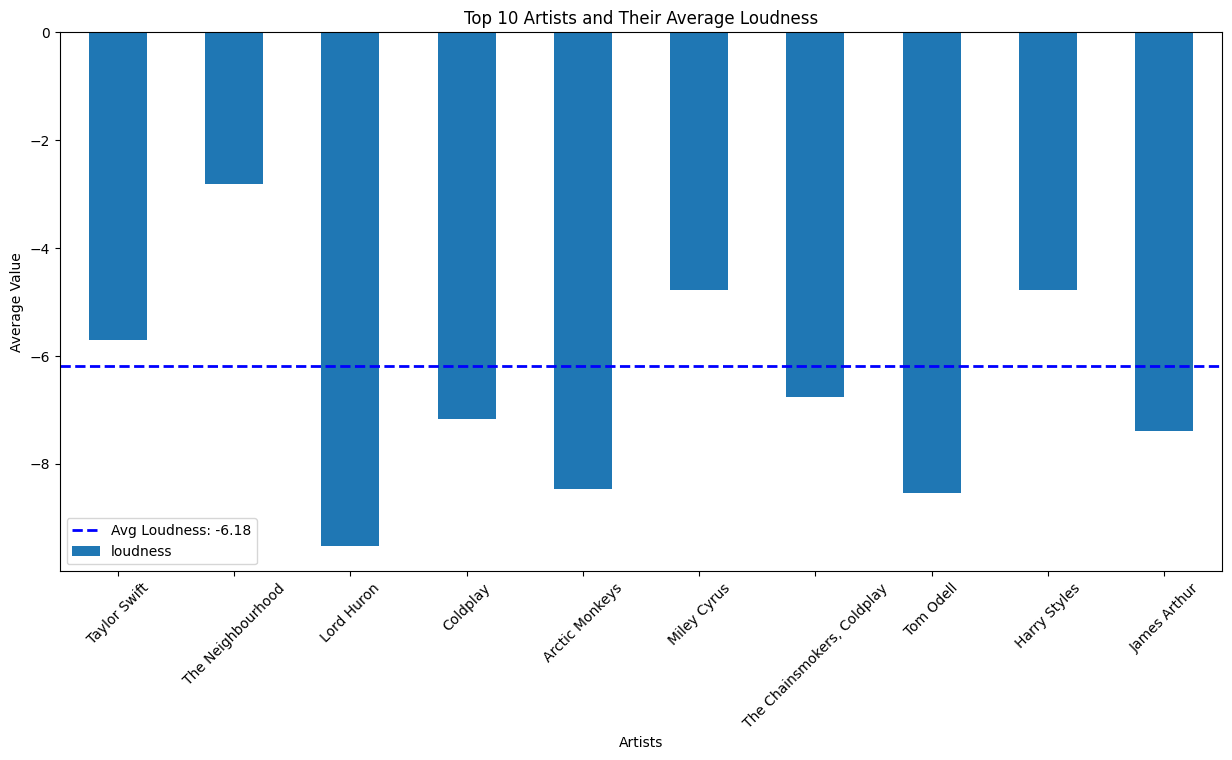

In [33]:
import matplotlib.pyplot as plt

# Group by artists and calculate the mean danceability and energy
artist_features = filtered_df.groupby('artists')['loudness'].mean()

# We already have top 10 artists based on popularity as top_artists
# Filter the features DataFrame to include only the top 10 artists
top_artist_features = artist_features.loc[top_artists.index]

# Plot the results
ax = top_artist_features.plot(kind='bar', figsize=(15, 7))
plt.title('Top 10 Artists and Their Average Loudness')
plt.xlabel('Artists')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# Calculate the average values for each feature
avg_loudness = merged_df['loudness'].mean()

# Draw the average lines
plt.axhline(y=avg_loudness, color='blue', linestyle='--', linewidth=2, label=f'Avg Loudness: {avg_loudness:.2f}')

# Add legend
plt.legend()

plt.show()


### Top 10 Artists 
(with the most tracks in the playlist)

In [34]:
top_artists = df['artists'].value_counts().head(10)
print(top_artists)

Bruno Mars         4
Ed Sheeran         4
The Weeknd         3
Imagine Dragons    3
Arctic Monkeys     2
Coldplay           2
Justin Bieber      2
Travis Scott       2
Eminem             2
Olivia Rodrigo     2
Name: artists, dtype: int64


In [35]:
# Filter data for top artists
top_artists_df = merged_df[merged_df['artists'].isin(top_artists.index)]

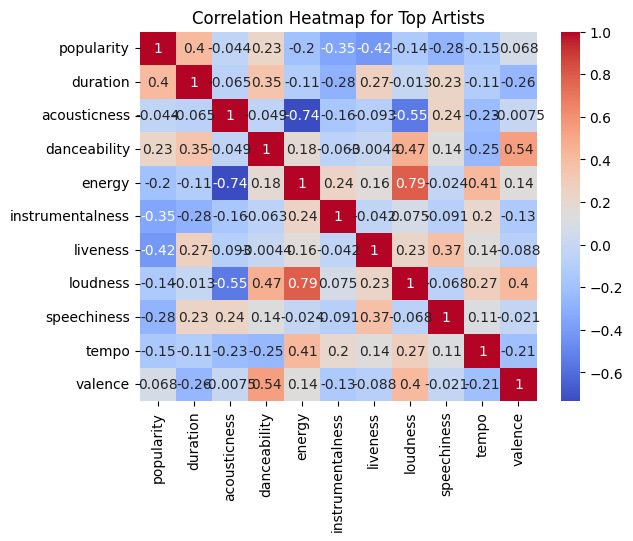

In [36]:
# Correlation between popularity and audio features for top artists
audio_features = ['popularity','duration','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
corr = top_artists_df[audio_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Top Artists')
plt.show()

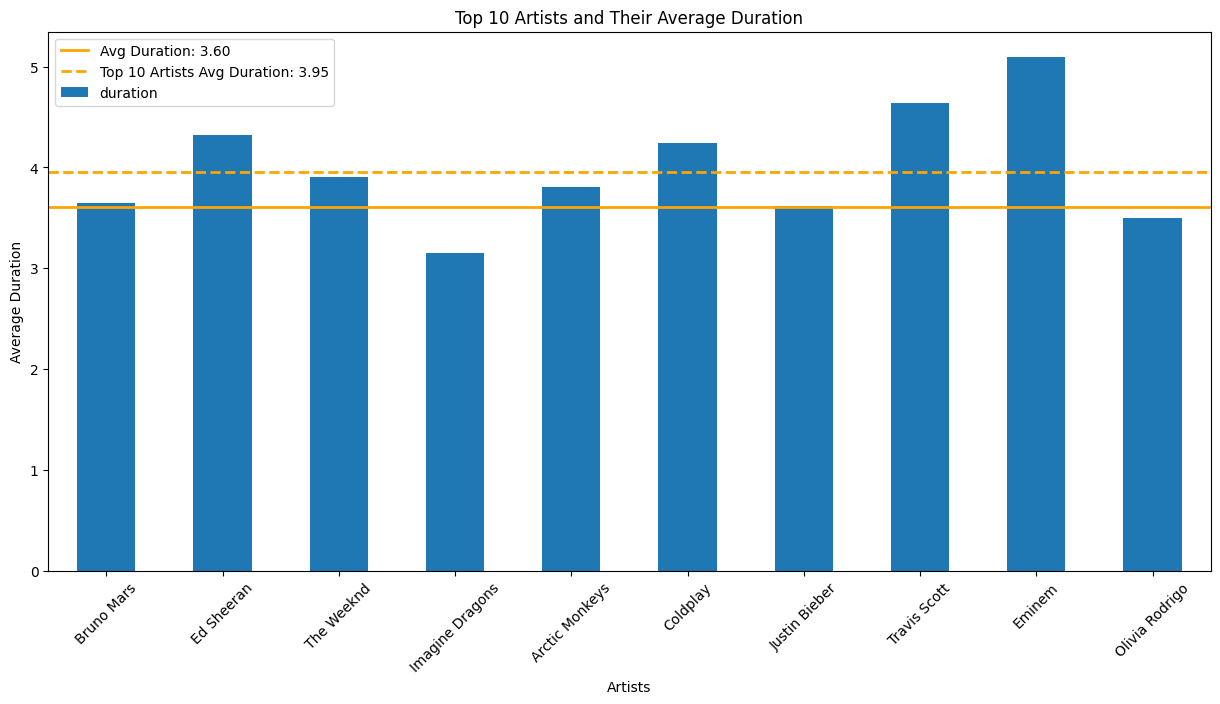

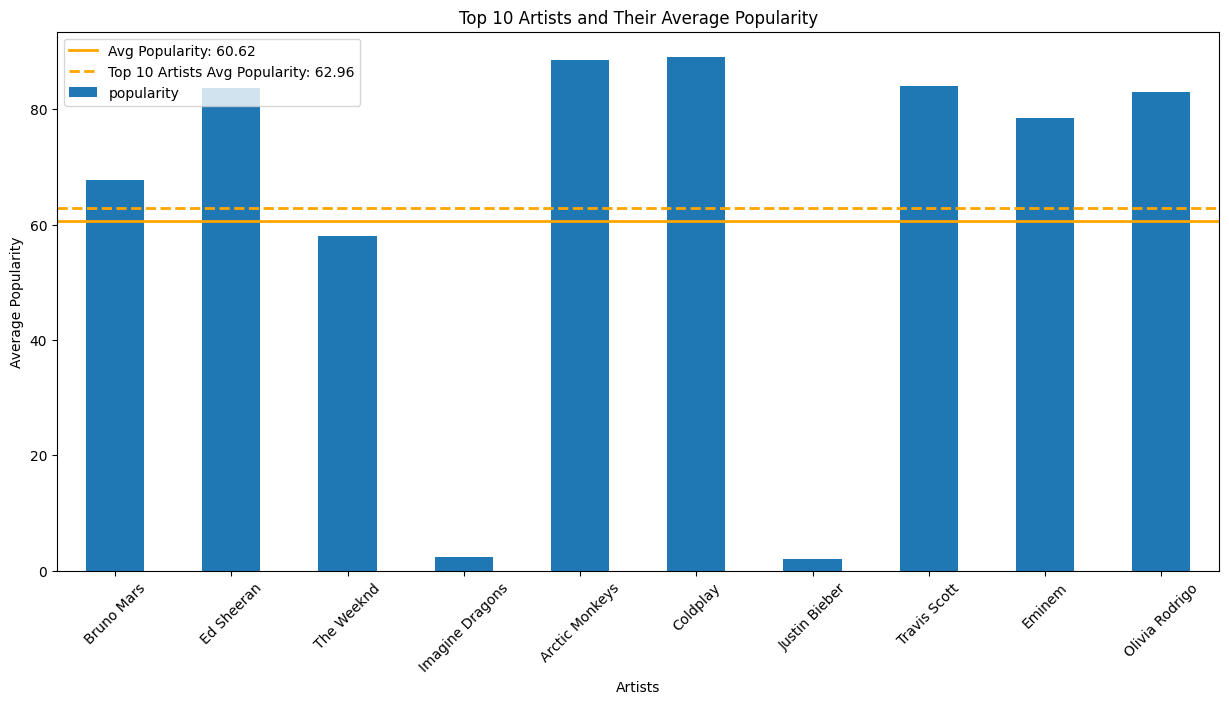

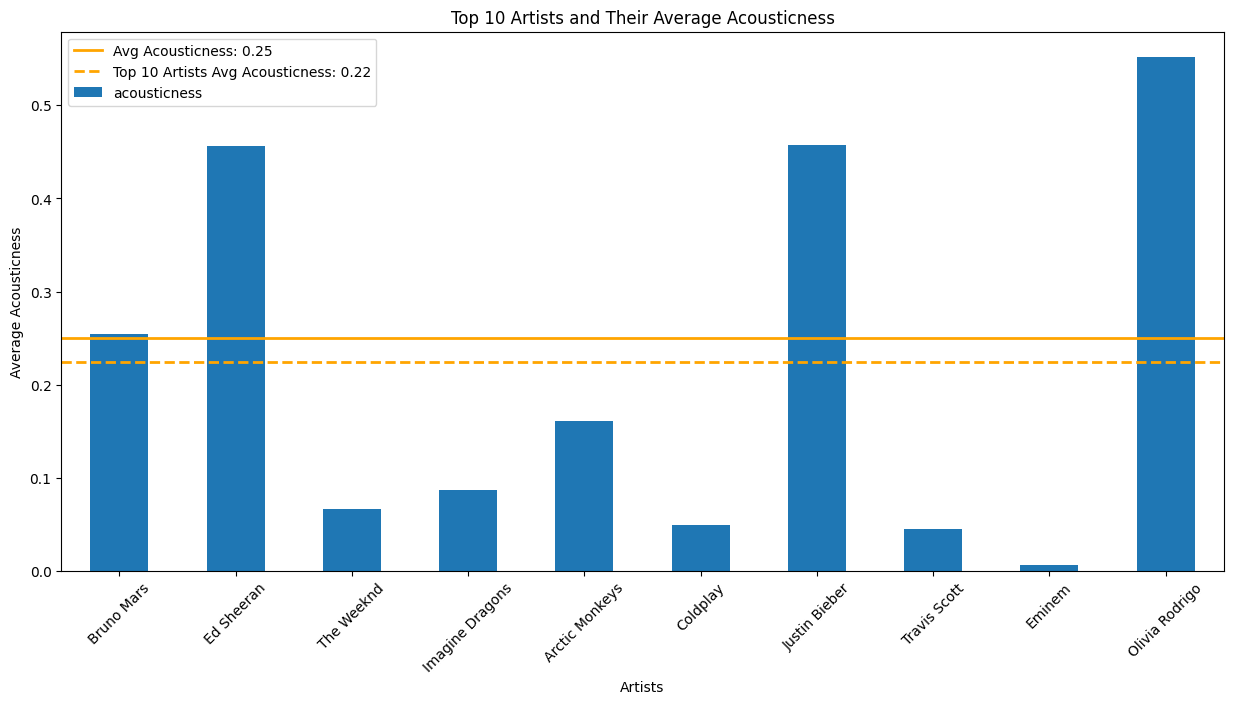

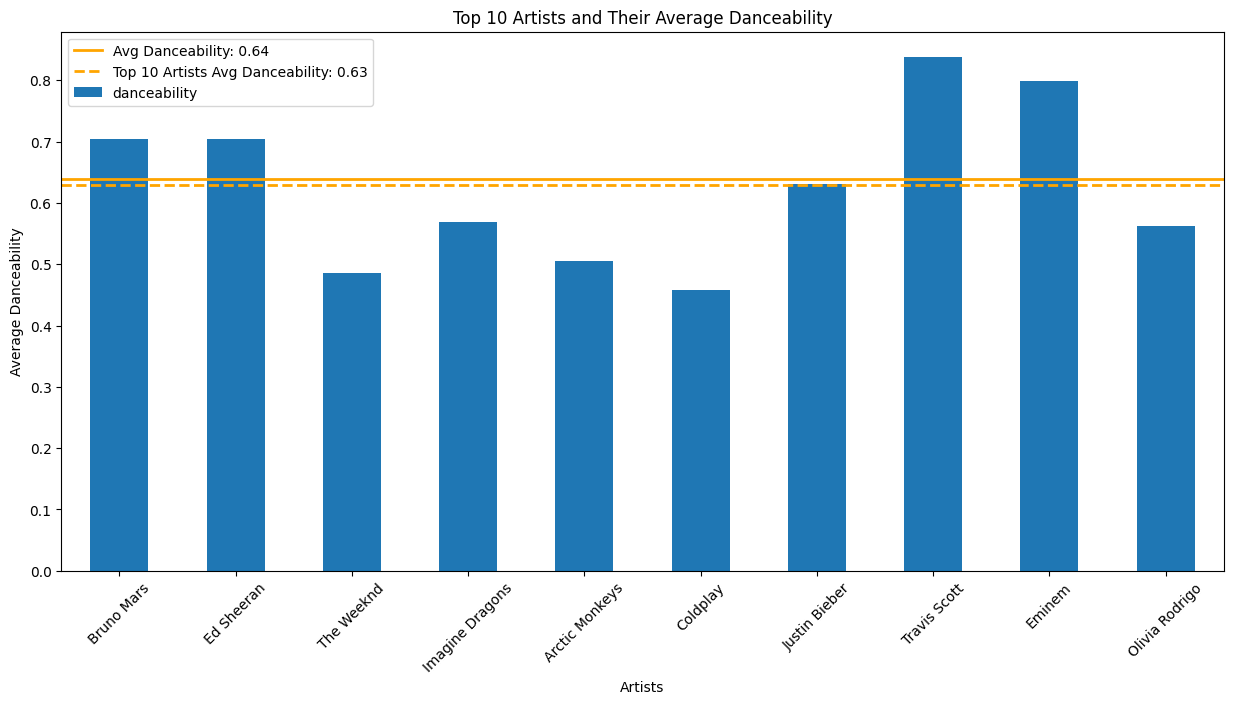

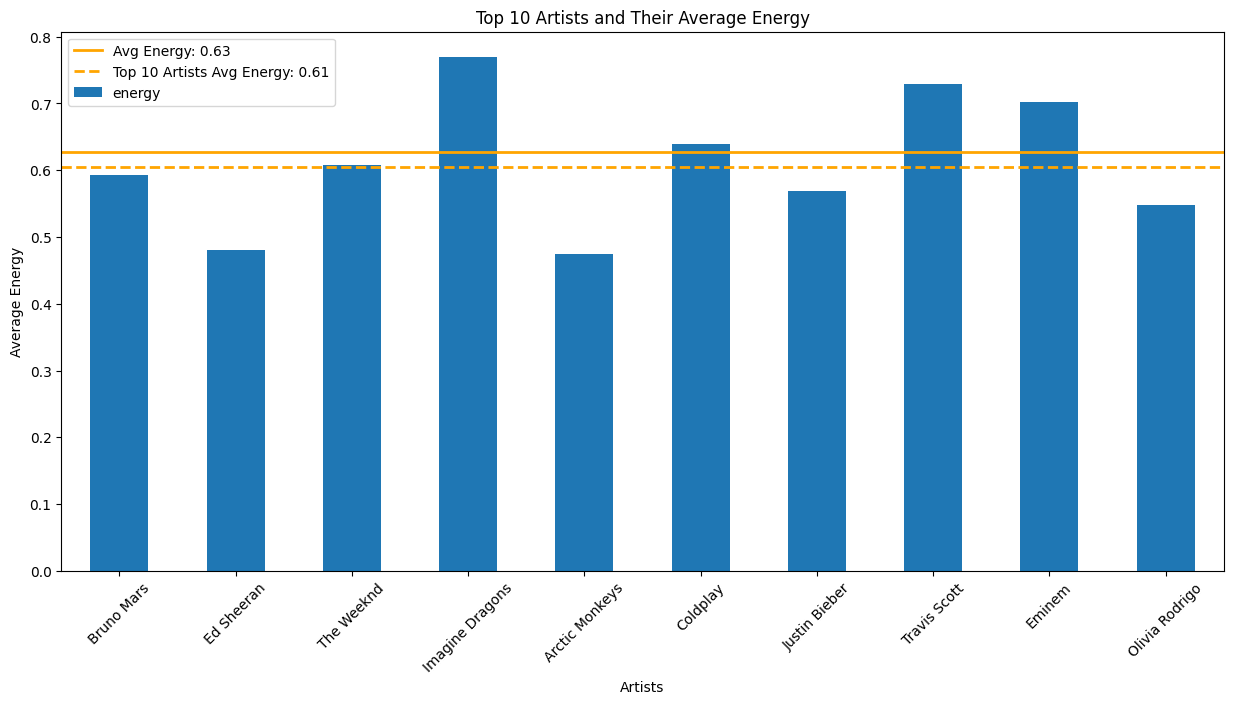

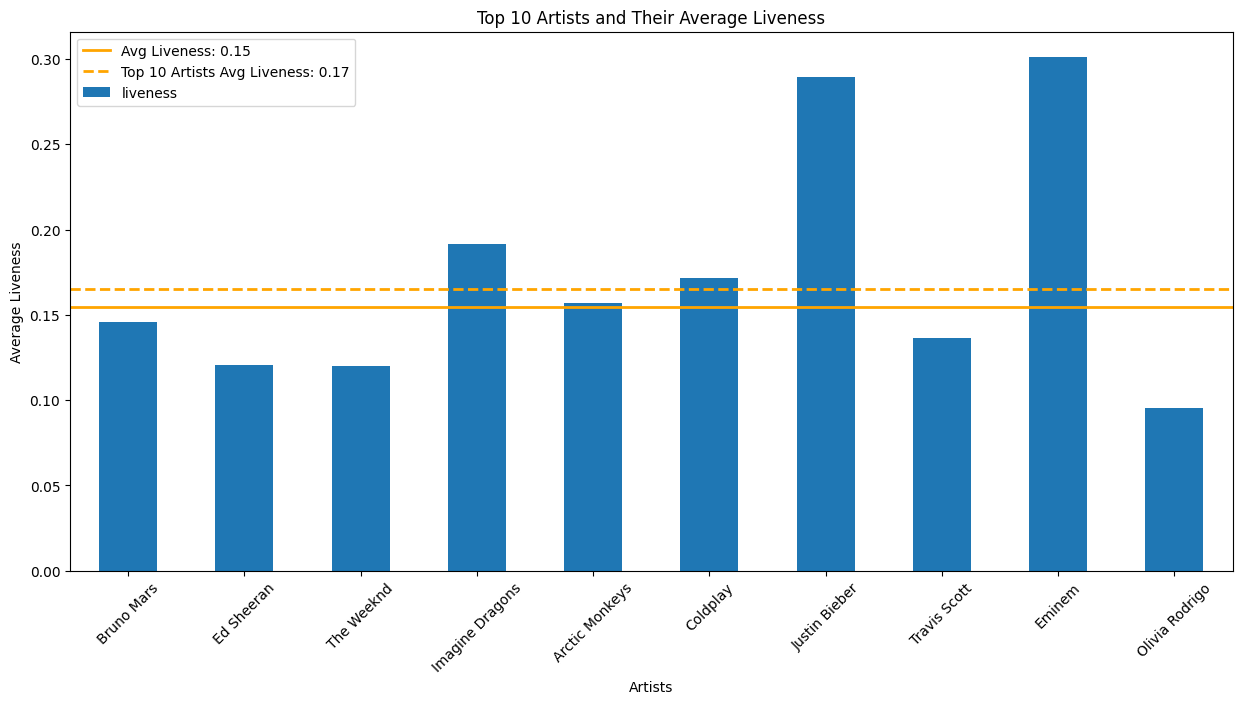

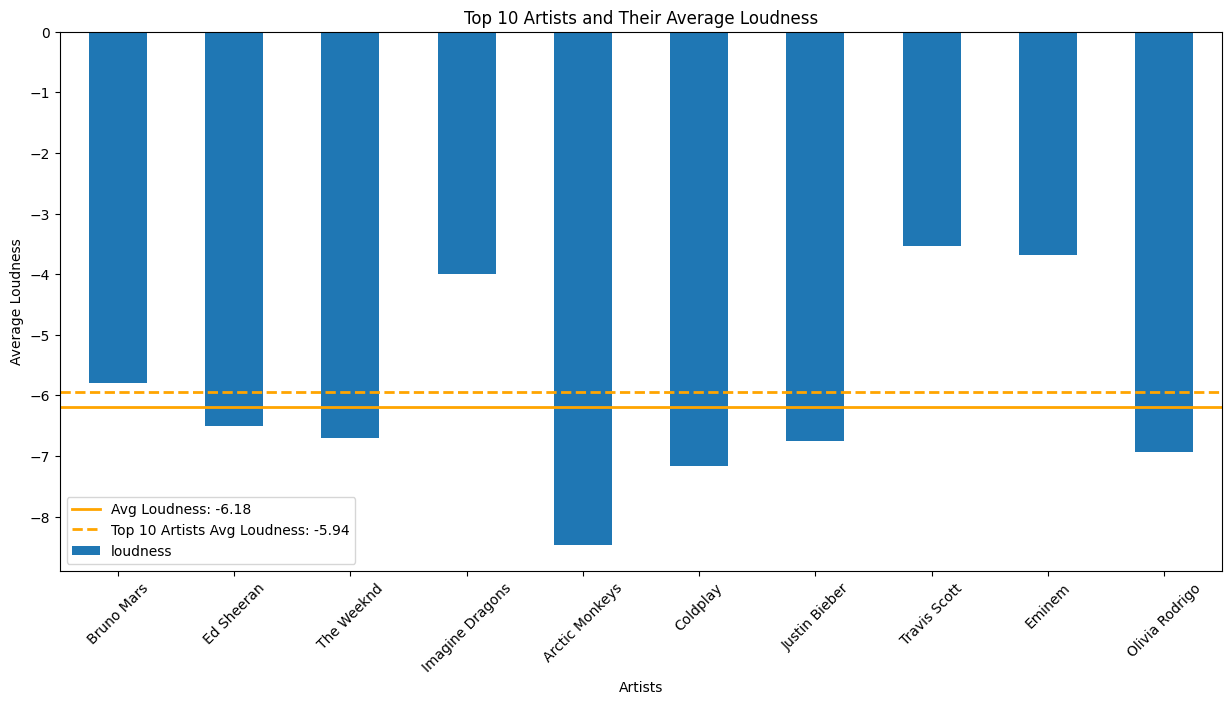

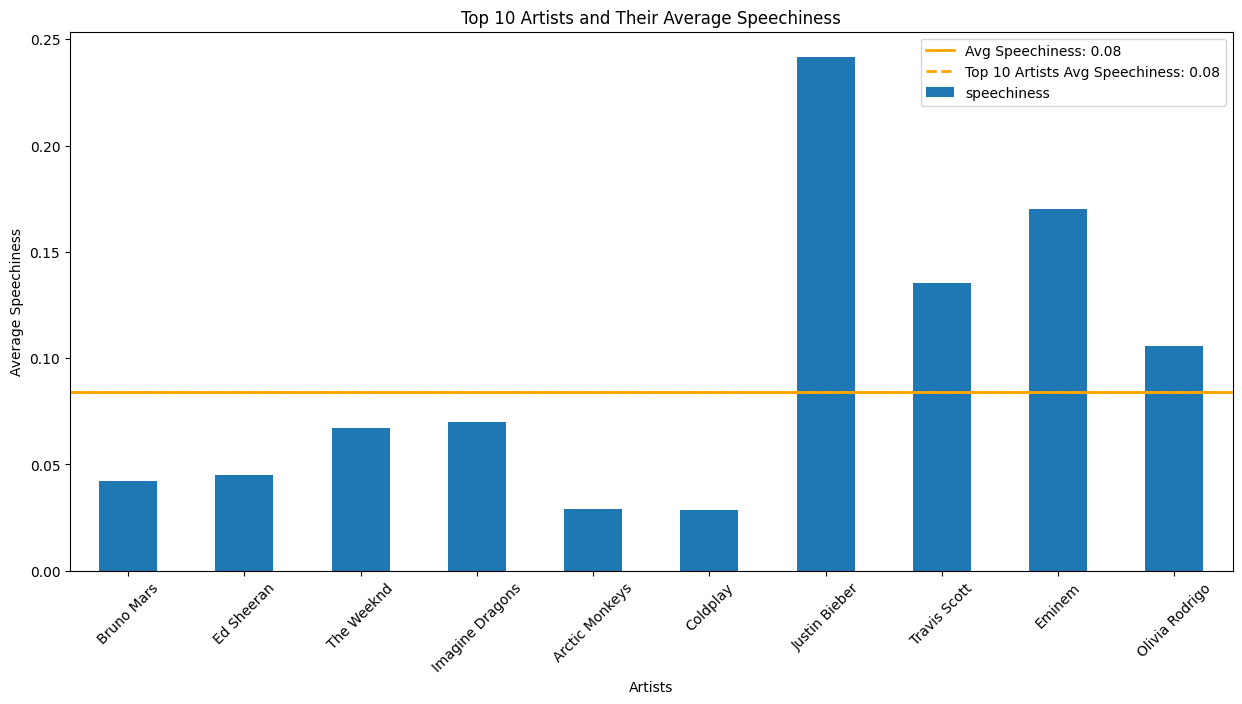

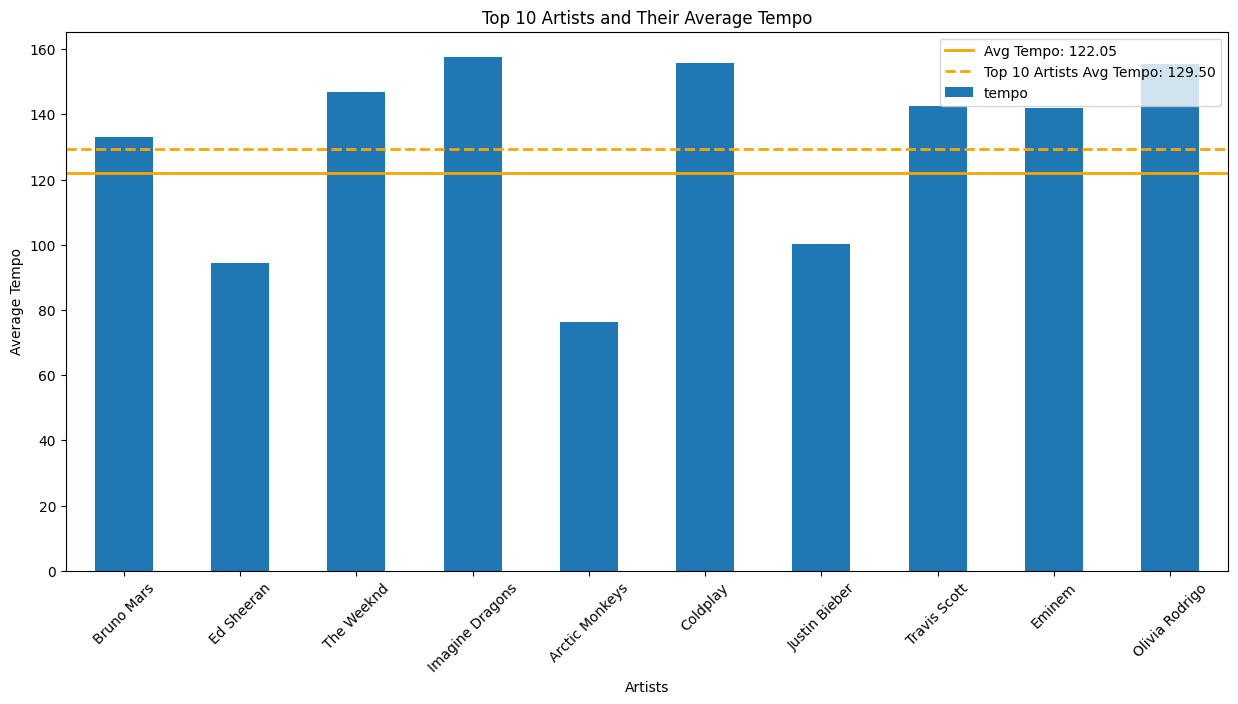

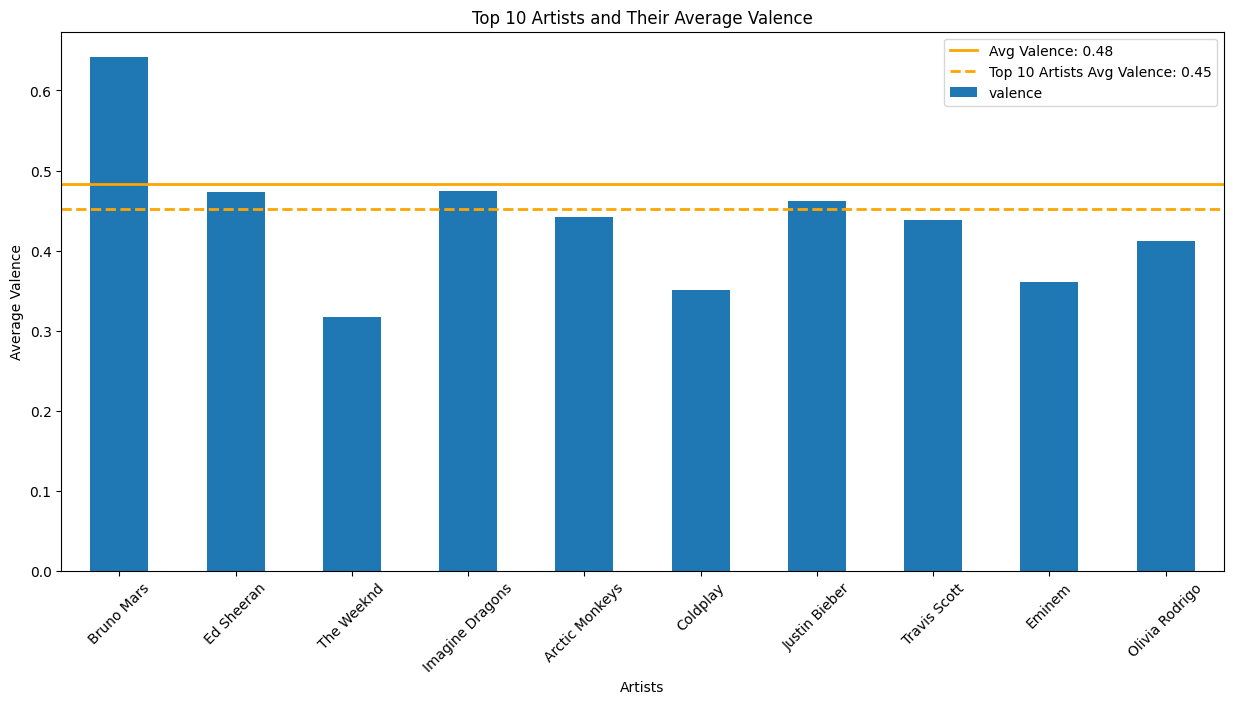

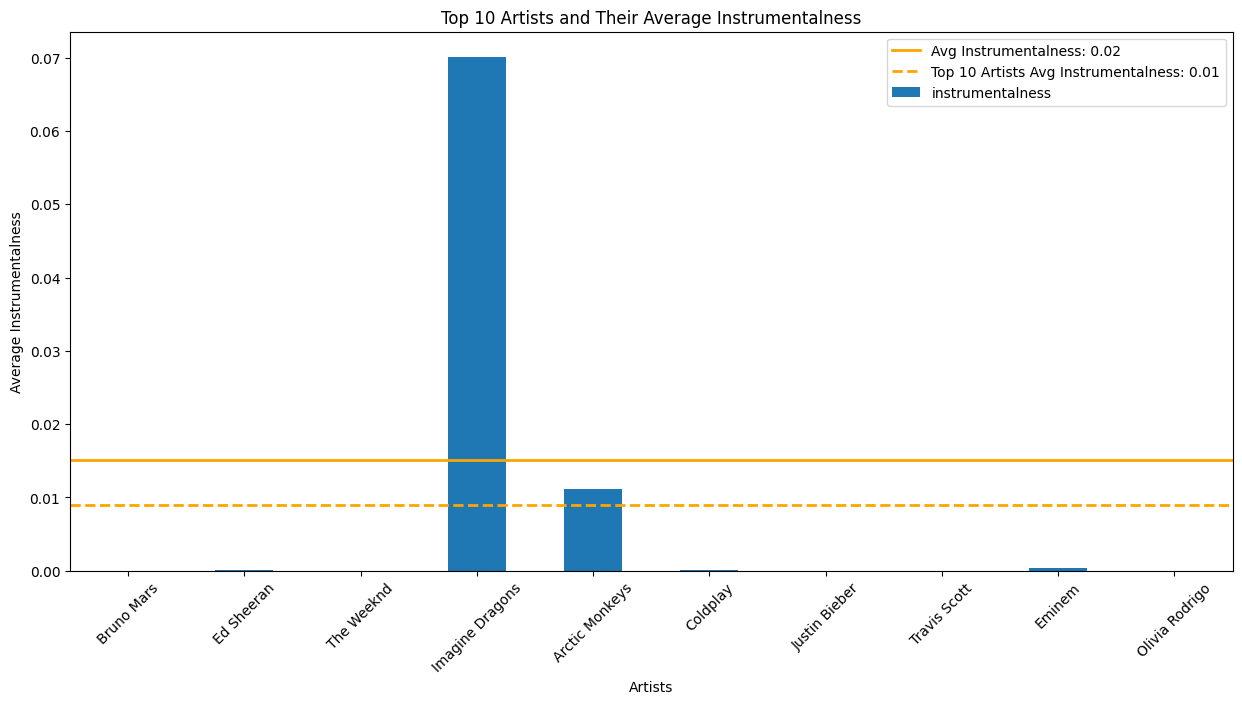

In [37]:
import matplotlib.pyplot as plt

# Get the top 10 artists
top_artists = df['artists'].value_counts().head(10)
top_artists_df = merged_df[merged_df['artists'].isin(top_artists.index)]

# List of audio features to analyze
audio_features = ['duration', 'popularity', 'acousticness', 'danceability', 'energy', 'liveness',
                  'loudness', 'speechiness', 'tempo', 'valence','instrumentalness']

# Plot each feature
for feature in audio_features:
    artist_features = top_artists_df.groupby('artists')[feature].mean()
    top_artist_features = artist_features.loc[top_artists.index] #sort values according to the value count

    # Plot the results
    ax = top_artist_features.plot(kind='bar', figsize=(15, 7))
    plt.title(f'Top 10 Artists and Their Average {feature.capitalize()}')
    plt.xlabel('Artists')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.xticks(rotation=45)

    # Calculate the average value for the current feature
    avg_feature = filtered_df[feature].mean()
    avg_feature_top = top_artists_df[feature].mean()


    # Draw the average line
    plt.axhline(y=avg_feature, color='orange', linestyle='-', linewidth=2, label=f'Avg {feature.capitalize()}: {avg_feature:.2f}')
    plt.axhline(y=avg_feature_top, color='orange', linestyle='--', linewidth=2, label=f'Top 10 Artists Avg {feature.capitalize()}: {avg_feature_top:.2f}')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


## Group by 'key'

***Pitch Class Notation***: Each pitch class is assigned a number from 0 to 11.\
0: C\
1: C♯/D♭\
2: D\
3: D♯/E♭\
4: E\
5: F\
6: F♯/G♭\
7: G\
8: G♯/A♭\
9: A\
10: A♯/B♭\
11: B

In [38]:
# Group by 'key' and aggregate song names
grouped_key = merged_df.groupby('key')['name'].apply(list).reset_index()

# Print the grouped DataFrame
print(grouped_key)

     key                                               name
0    0.0  [Watermelon Sugar, Circles, Bohemian Rhapsody ...
1    1.0  [Blinding Lights, Shape of You, Someone You Lo...
2    2.0  [Sunflower - Spider-Man: Into the Spider-Verse...
3    3.0  [Losing it now - Cottage Version, Demons, In t...
4    4.0  [lovely (with Khalid), Another Love, Photograp...
5    5.0  [rockstar, Magic Show, Double Vision, Viva La ...
6    6.0  [As It Was, Dance Monkey, Lucid Dreams, Enfin ...
7    7.0  [Starboy, Worth It, Take Me To Church, God's P...
8    8.0  [Perfect, Closer, All of Me, SAD!, Let Me Love...
9    9.0  [COCOCO, Señorita, Cruel Summer, Stone Cold, T...
10  10.0  [Sweater Weather, Believer, Say You Won't Let ...
11  11.0  [Heat Waves, Something Just Like This, Don't S...


In [39]:
for index, row in grouped_key.iterrows():
    print(f"Key: {row['key']}")
    print("Songs:", ", ".join(row['name']))
    print("\n")

Key: 0.0
Songs: Watermelon Sugar, Circles, Bohemian Rhapsody - Remastered 2011, Thunder, I Wanna Be Yours, The Hills, When I Was Your Man, Jocelyn Flores, Flowers, Sorry, Stay With Me


Key: 1.0
Songs: Blinding Lights, Shape of You, Someone You Loved, One Dance, STAY (with Justin Bieber), Riptide, Counting Stars, Die For You, 7 rings, HUMBLE., Mr. Brightside, That's What I Like, Every Breath You Take, Cold Heart - PNAU Remix, Smells Like Teen Spirit


Key: 2.0
Songs: Sunflower - Spider-Man: Into the Spider-Verse, Thinking out Loud, Can't Hold Us (feat. Ray Dalton), Wake Me Up - Radio Edit, EVEN NOW, Lose Yourself, Not Regular, Havana (feat. Young Thug)


Key: 3.0
Songs: Losing it now - Cottage Version, Demons, In the End


Key: 4.0
Songs: lovely (with Khalid), Another Love, Photograph, Love Yourself, Stressed Out


Key: 5.0
Songs: rockstar, Magic Show, Double Vision, Viva La Vida, Do I Wanna Know?, Just the Way You Are, Happier, Locked out of Heaven, Too Good At Goodbyes


Key: 6.0
Son

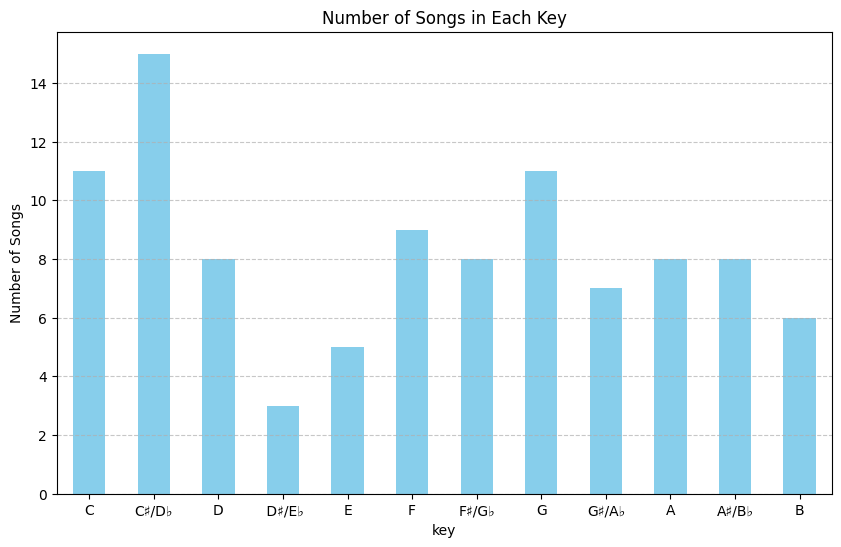

In [40]:
key_names = ['C', 'C♯/D♭', 'D',' D♯/E♭', 'E', 'F', 'F♯/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B']
# Count the number of songs in each key
key_counts = merged_df['key'].value_counts().sort_index()

# Plot the number of songs in each key
plt.figure(figsize=(10, 6))
key_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs in Each Key')
plt.xlabel('key')
plt.ylabel('Number of Songs')
plt.xticks(ticks=range(len(key_names)), labels=key_names, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
# add grid lines - axis='x'/'y'/'both' - linestyle='--' means dashed lines, '-' for solid lines, ':' for dotted lines, and '-.' for dash-dot lines.
#alpha sets the transparency level (0 - 1)
plt.show()

## Time signature distribution

In [41]:
# Group by 'key' and aggregate song names
grouped_time_sign = merged_df.groupby('time_signature')['name'].apply(list).reset_index()

# Print the grouped DataFrame
print(grouped_time_sign)

   time_signature                                               name
0             3.0                        [Perfect, The Night We Met]
1             4.0  [Blinding Lights, Shape of You, Someone You Lo...
2             5.0                                        [The Hills]


In [42]:
for index, row in grouped_time_sign.iterrows():
    print(f"time_signature: {row['time_signature']}")
    print("Songs:", ", ".join(row['name']))
    print("\n")

time_signature: 3.0
Songs: Perfect, The Night We Met


time_signature: 4.0
Songs: Blinding Lights, Shape of You, Someone You Loved, As It Was, Sunflower - Spider-Man: Into the Spider-Verse, Starboy, One Dance, STAY (with Justin Bieber), Sweater Weather, Dance Monkey, Believer, Heat Waves, rockstar, Worth It, Say You Won't Let Go, Closer, COCOCO, lovely (with Khalid), Watermelon Sugar, Señorita, Something Just Like This, Magic Show, Don't Start Now, Riptide, Take Me To Church, Lucid Dreams, Another Love, Photograph, Wavy, Counting Stars, God's Plan, Like Em Country, Circles, Losing it now - Cottage Version, bad guy, Bohemian Rhapsody - Remastered 2011, Thinking out Loud, Shallow, Can't Hold Us (feat. Ray Dalton), goosebumps, Love Yourself, Enfin vivre, Thunder, Yellow, All of Me, Cruel Summer, Wake Me Up - Radio Edit, Stone Cold, I Wanna Be Yours, Die For You, Stressed Out, Double Vision, Demons, No Role Modelz, Let Her Go, EVEN NOW, 7 rings, HUMBLE., Mr. Brightside, Viva La Vida, Lose 

In [43]:
time_sign_counts = merged_df['time_signature'].value_counts().sort_index()
print(time_sign_counts)

3.0     2
4.0    96
5.0     1
Name: time_signature, dtype: int64


## Grouped by 'mode'
***minor = 0\
major = 1***

In [44]:
# Group by 'key' and aggregate song names
grouped_mode = merged_df.groupby('mode')['name'].apply(list).reset_index()

# Print the grouped DataFrame
print(grouped_mode)

   mode                                               name
0   0.0  [Shape of You, As It Was, Dance Monkey, Believ...
1   1.0  [Blinding Lights, Someone You Loved, Sunflower...


In [45]:
for index, row in grouped_mode.iterrows():
    print(f"mode: {row['mode']}")
    print("Songs:", ", ".join(row['name']))
    print("\n")

mode: 0.0
Songs: Shape of You, As It Was, Dance Monkey, Believer, rockstar, Worth It, COCOCO, lovely (with Khalid), Señorita, Something Just Like This, Magic Show, Don't Start Now, Lucid Dreams, Another Love, Counting Stars, Like Em Country, Bohemian Rhapsody - Remastered 2011, I Wanna Be Yours, Die For You, The Hills, Stressed Out, No Role Modelz, 7 rings, HUMBLE., Viva La Vida, One Kiss (with Dua Lipa), Dangerous, Treat You Better, Jocelyn Flores, XO Tour Llif3, In the End, Sorry, Lean On (feat. MØ & DJ Snake), New Rules, Not Regular, Levitating (feat. DaBaby), There's Nothing Holdin' Me Back, What If You Mean It


mode: 1.0
Songs: Blinding Lights, Someone You Loved, Sunflower - Spider-Man: Into the Spider-Verse, Starboy, One Dance, STAY (with Justin Bieber), Sweater Weather, Heat Waves, Perfect, Say You Won't Let Go, Closer, Watermelon Sugar, Riptide, Take Me To Church, Photograph, Wavy, God's Plan, Circles, Losing it now - Cottage Version, bad guy, Thinking out Loud, Shallow, Can't

In [46]:
mode_counts = merged_df['mode'].value_counts().sort_index()
mode_counts

0.0    38
1.0    61
Name: mode, dtype: int64

# Using librosa to Extract Audio Features
***Tempo***: Extracted using the librosa.beat.beat_track function
- measures regular rhythmic pulses

***Danceability***: Approximated using the root mean square (RMS) energy
- calculates the average power of the audio signal. Imagine you have a bunch of numbers representing the sound wave. RMS energy takes the square of each number, finds the average of these squares, and then takes the square root of that average. In simple terms, higher RMS energy means the sound is louder, and lower RMS energy means the sound is quieter.\

***Energy***: Approximated using the spectral centroid.
- calculates the center of mass of the sound spectrum. Imagine you have a graph showing the different frequencies in the sound. The spectral centroid finds the “balance point” of this graph. In simple terms, a higher spectral centroid means the sound is brighter, and a lower spectral centroid means the sound is darker.

***Valence***: Approximated using the zero-crossing rate.
- Imagine the sound wave as a line that goes up and down. Each time it crosses the horizontal axis (zero line), it’s called a zero-crossing. It counts how many times the sound wave crosses the zero line in a given time period. In simple terms, a higher zero-crossing rate means the sound has more high-frequency content (like a hiss), and a lower zero-crossing rate means the sound has more low-frequency content (like a hum).

In [47]:
# pip install librosa
# import librosa

# # Load the audio file
# y, sr = librosa.load('path_to_your_audio_file.mp3')

# # Extract features
# tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
# danceability = librosa.feature.rms(y=y).mean()
# energy = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
# valence = librosa.feature.zero_crossing_rate(y=y).mean()

# # Print the extracted features
# print(f"Tempo: {tempo}")
# print(f"Danceability: {danceability}")
# print(f"Energy: {energy}")
# print(f"Valence: {valence}")

# THANK YOU!
Special Thanks to Ankit Bansal Sir for his inspiration and teachings.